### 1. Importing Visualization Libraries and Data

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Defining the path

path = r'/Users/sijju/Downloads/Data analysis/Data Immersion/Acheivement 6/Project'

In [4]:
# Import Data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'))

### 2. Data Cleaning

#### Renaming columns

In [5]:
df.shape

(430560, 13)

In [6]:
df.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State',
       'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')

In [7]:
df.dtypes

Data As Of             object
Start Date             object
End Date               object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object

### 3. Exploring Relations

#### Correlations

### First, I will create a new dataframe subset of just the columns I am interested in analyzing

In [8]:
selected_columns = ['Year', 'Month', 'State', 'Condition Group', 'Condition', 'Age Group', 'COVID-19 Deaths', 'Number of Mentions']
df_selected = df[selected_columns]

In [9]:
# 4 of the selected variables are categorical, so they need to be encoded before running the correlation analysis
df_encoded = df_selected.copy()
df_encoded['State'] = df_encoded['State'].astype('category').cat.codes
df_encoded['Condition Group'] = df_encoded['Condition Group'].astype('category').cat.codes
df_encoded['Condition'] = df_encoded['Condition'].astype('category').cat.codes
df_encoded['Age Group'] = df_encoded['Age Group'].astype('category').cat.codes

In [10]:
# Verify the dataframe subset is correct
print(df_encoded.head())
print(df_encoded.info())
df_encoded.shape

     Year  Month  State  Condition Group  Condition  Age Group  \
0  2020.0    1.0      0                9         11          0   
1  2020.0    2.0      0                9         11          0   
2  2020.0    3.0      0                9         11          0   
3  2020.0    4.0      0                9         11          0   
4  2020.0    5.0      0                9         11          0   

   COVID-19 Deaths  Number of Mentions  
0              0.0                 0.0  
1              0.0                 0.0  
2              0.0                 0.0  
3              0.0                 0.0  
4              0.0                 0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                430560 non-null  float64
 1   Month               430560 non-null  float64
 2   State               430560 non-null  int8 

(430560, 8)

In [11]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()
print(corr_matrix)

                            Year         Month         State  Condition Group  \
Year                1.000000e+00 -1.322529e-01 -2.265905e-11     2.207265e-13   
Month              -1.322529e-01  1.000000e+00 -1.207809e-14     2.097864e-16   
State              -2.265905e-11 -1.207809e-14  1.000000e+00    -2.141092e-16   
Condition Group     2.207265e-13  2.097864e-16 -2.141092e-16     1.000000e+00   
Condition           7.038304e-14  1.952307e-17 -2.411733e-14     6.493454e-01   
Age Group          -2.107111e-14 -1.492266e-17  9.968621e-15     4.452150e-18   
COVID-19 Deaths    -6.973445e-02  8.086723e-03 -1.458081e-02    -4.844597e-02   
Number of Mentions -6.921557e-02  7.953742e-03 -1.327818e-02    -6.455394e-02   

                       Condition     Age Group  COVID-19 Deaths  \
Year                7.038304e-14 -2.107111e-14        -0.069734   
Month               1.952307e-17 -1.492266e-17         0.008087   
State              -2.411733e-14  9.968621e-15        -0.014581   
Co

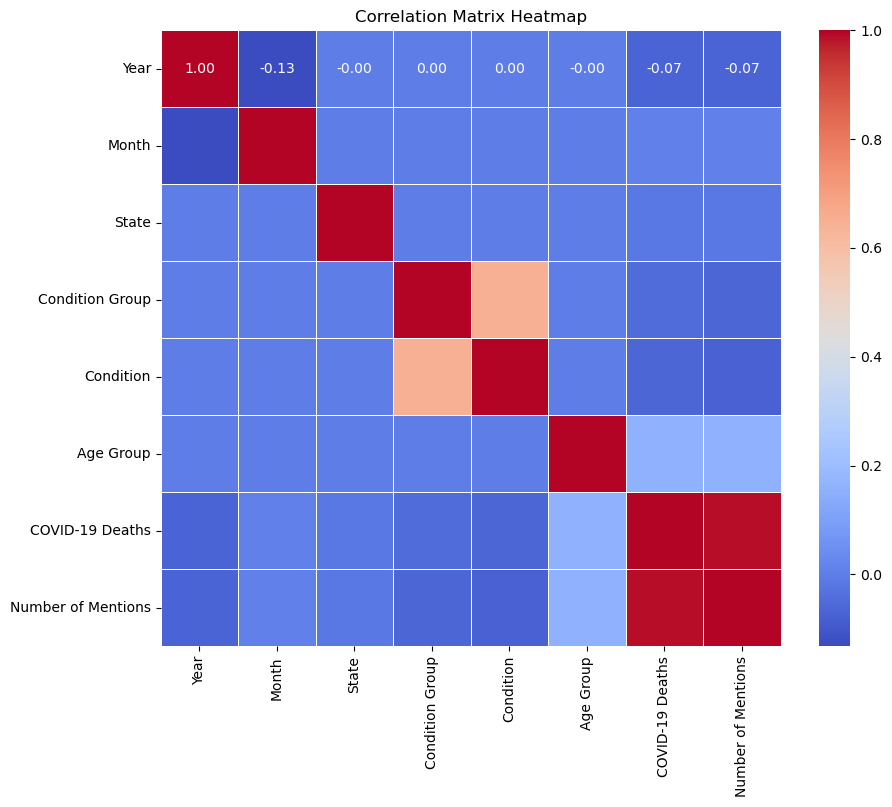

In [12]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
heatmap_corr_matrix = plt.gcf()
plt.show()

## Top Positive Correlations
    COVID-19 Deaths and Number of Mentions: 0.989010
    Condition and Condition Group: 0.649345
    Age Group and Number of Mentions: 0.161710
    Age Group and COVID-19 Deaths: 0.157742
    Month and Number of Mentions: 0.007974
    Month and COVID-19 Deaths: 0.008002

## Top Negative Correlations
    Year and Month: -0.132253
    Condition and Number of Mentions: -0.075355
    Year and Number of Mentions: -0.069180
    Year and COVID-19 Deaths: -0.069730
    Condition and COVID-19 Deaths: -0.063393
    Condition Group and Number of Mentions: -0.064490
    Condition Group and COVID-19 Deaths: -0.048451
    State and COVID-19 Deaths: -0.014550
    State and Number of Mentions: -0.013270

### Now I will focus on exploring correlations within the Condition column

In [13]:
# First create a list of unique medical conditions from the "Condition" column
conditions = df_selected['Condition'].unique()

Correlation Matrix for Influenza and pneumonia:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.238720e-01  1.699947e-02 -2.967881e-02  2.239174e-01   
Number of Mentions -1.236194e-01  1.772389e-02 -2.817201e-02  2.243845e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.123872           -0.123619  
Month                      0.016999            0.017724  
State                     -0.029679           -0.028172  
Age Group                  0.223917            0.224384  
COVID-19 Deaths            1.000000            0.999626  
Number of Mentions         0.999626            1.000000 

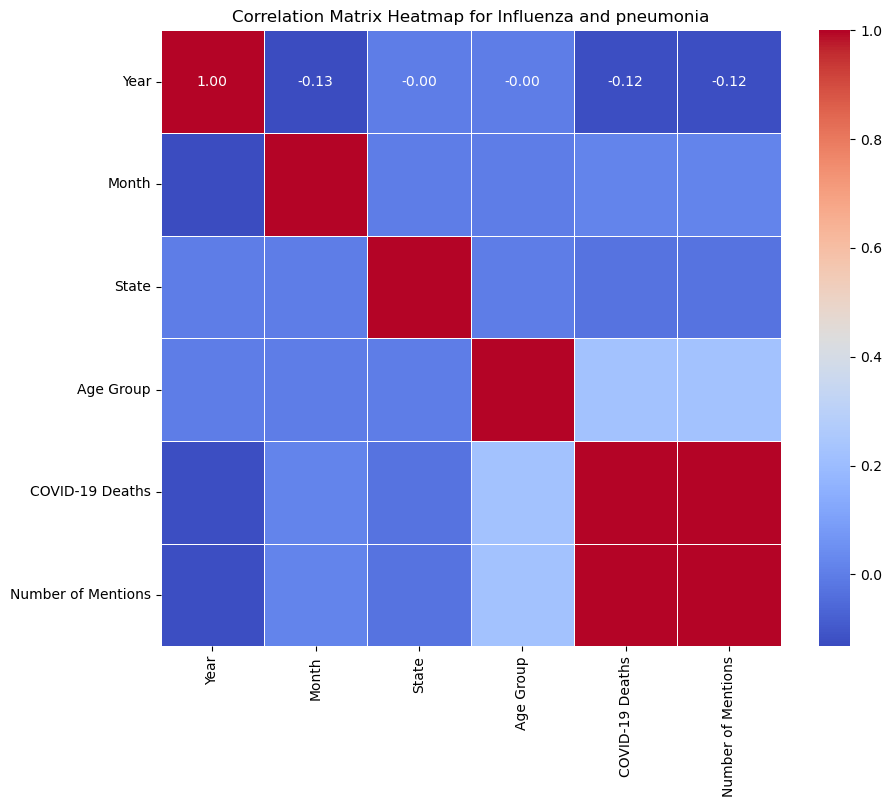

Correlation Matrix for Chronic lower respiratory diseases:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.006630e-01  1.740095e-02 -1.849104e-02  3.301386e-01   
Number of Mentions -9.865530e-02  1.834135e-02 -1.903178e-02  3.283031e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.100663           -0.098655  
Month                      0.017401            0.018341  
State                     -0.018491           -0.019032  
Age Group                  0.330139            0.328303  
COVID-19 Deaths            1.000000            0.990753  
Number of Mentions         0.990753          

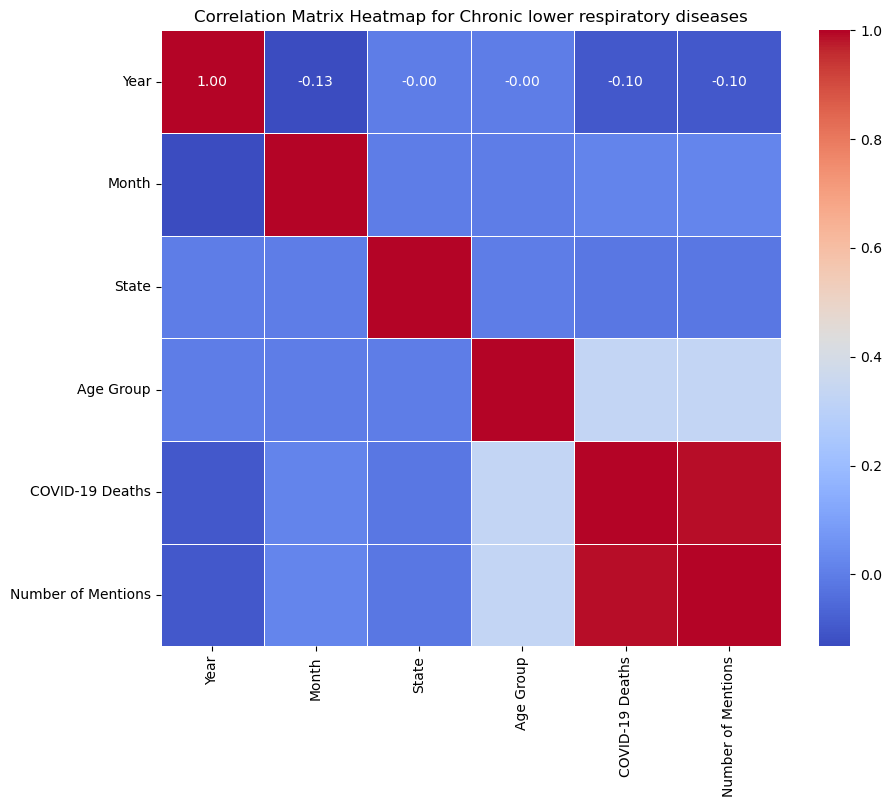

Correlation Matrix for Adult respiratory distress syndrome:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.650603e-01  1.865205e-02 -2.129236e-02  1.682765e-01   
Number of Mentions -1.650670e-01  1.851857e-02 -2.188628e-02  1.680957e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.165060           -0.165067  
Month                      0.018652            0.018519  
State                     -0.021292           -0.021886  
Age Group                  0.168276            0.168096  
COVID-19 Deaths            1.000000            0.993797  
Number of Mentions         0.993797         

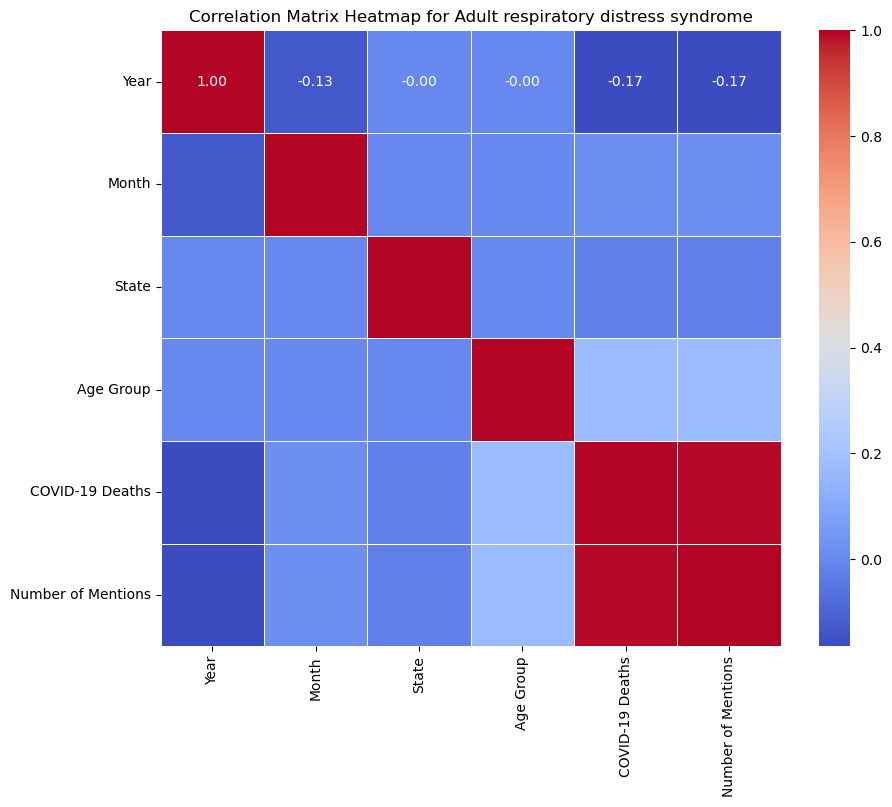

Correlation Matrix for Respiratory failure:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.202726e-01  1.634774e-02 -3.827400e-02  2.342549e-01   
Number of Mentions -1.190484e-01  1.601282e-02 -3.751628e-02  2.377365e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.120273           -0.119048  
Month                      0.016348            0.016013  
State                     -0.038274           -0.037516  
Age Group                  0.234255            0.237736  
COVID-19 Deaths            1.000000            0.999453  
Number of Mentions         0.999453            1.000000   



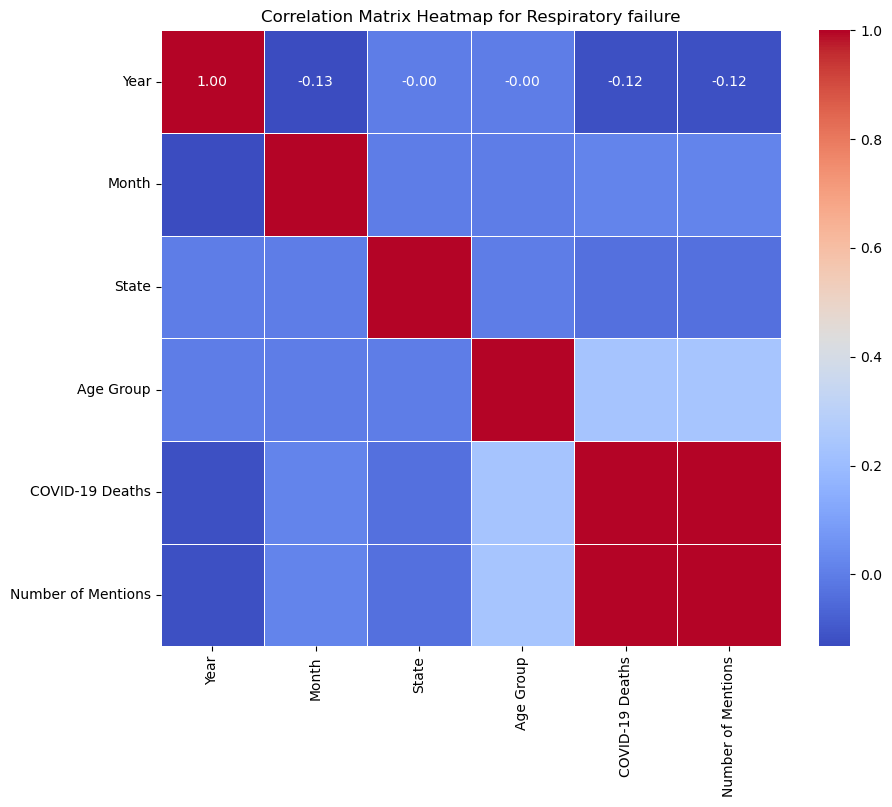

Correlation Matrix for Respiratory arrest:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.036515e-01  3.054312e-02 -7.001953e-02  2.716530e-01   
Number of Mentions -1.017690e-01  2.942449e-02 -6.892258e-02  2.708226e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.103651           -0.101769  
Month                      0.030543            0.029424  
State                     -0.070020           -0.068923  
Age Group                  0.271653            0.270823  
COVID-19 Deaths            1.000000            0.938304  
Number of Mentions         0.938304            1.000000   



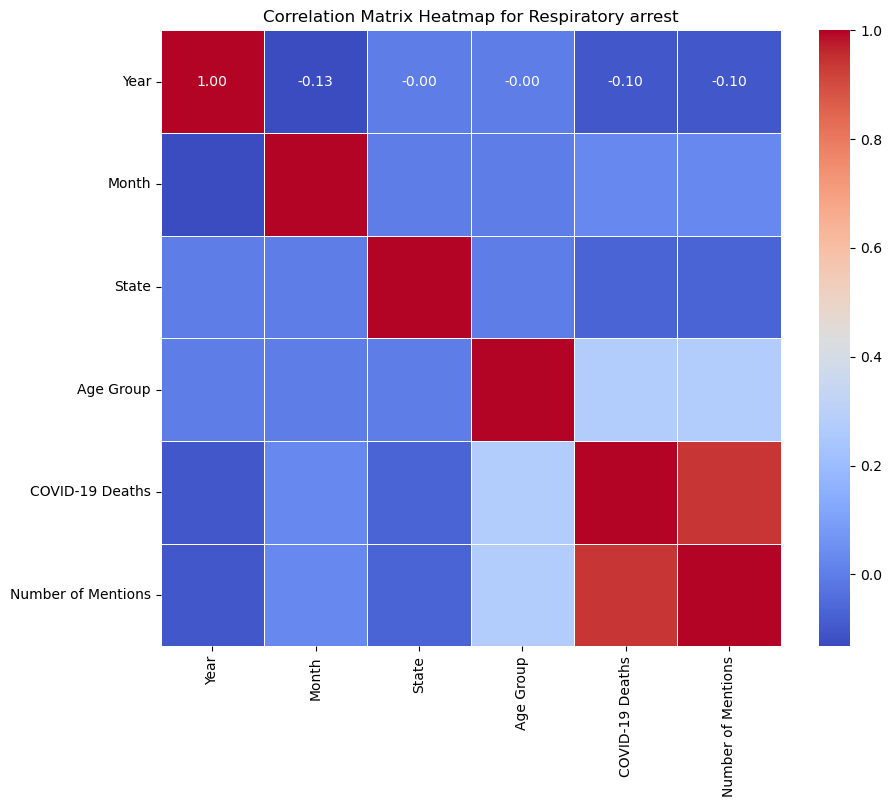

Correlation Matrix for Other diseases of the respiratory system:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -6.175696e-02  1.058557e-02 -2.152313e-02  3.107611e-01   
Number of Mentions -5.948112e-02  8.255519e-03 -1.797218e-02  3.065867e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.061757           -0.059481  
Month                      0.010586            0.008256  
State                     -0.021523           -0.017972  
Age Group                  0.310761            0.306587  
COVID-19 Deaths            1.000000            0.962064  
Number of Mentions         0.962064    

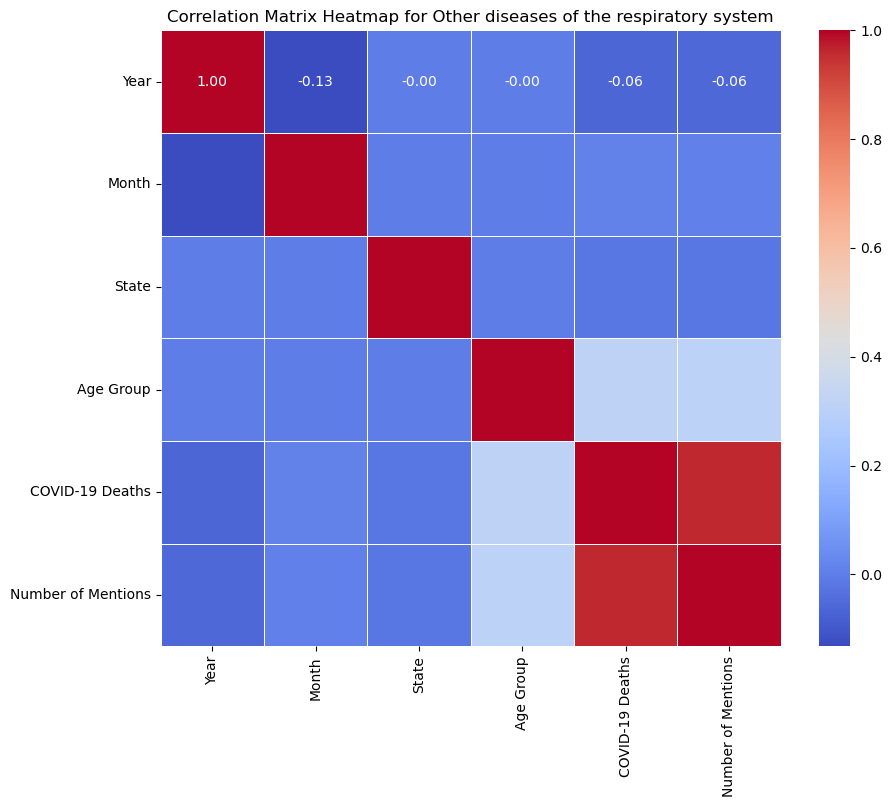

Correlation Matrix for Hypertensive diseases:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.150254e-01  6.292276e-03 -2.429229e-02  2.531324e-01   
Number of Mentions -1.141325e-01  6.051401e-03 -2.392708e-02  2.555287e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.115025           -0.114133  
Month                      0.006292            0.006051  
State                     -0.024292           -0.023927  
Age Group                  0.253132            0.255529  
COVID-19 Deaths            1.000000            0.998514  
Number of Mentions         0.998514            1.000000   

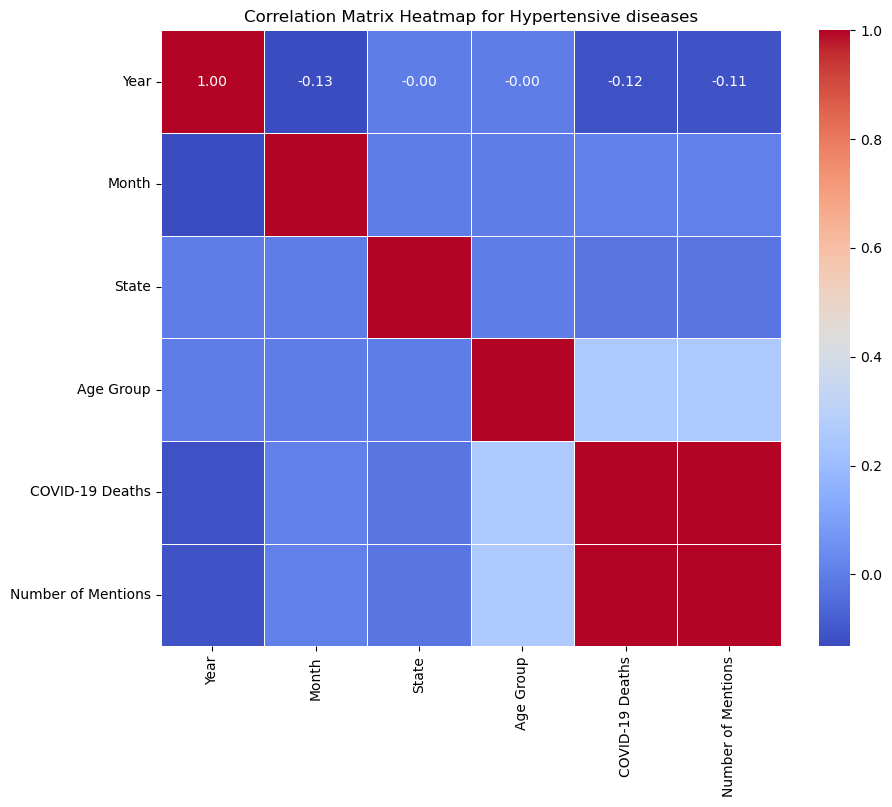

Correlation Matrix for Ischemic heart disease:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -9.982796e-02  1.172647e-02 -1.456679e-02  3.032153e-01   
Number of Mentions -9.844117e-02  1.099421e-02 -1.394469e-02  3.045283e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.099828           -0.098441  
Month                      0.011726            0.010994  
State                     -0.014567           -0.013945  
Age Group                  0.303215            0.304528  
COVID-19 Deaths            1.000000            0.994950  
Number of Mentions         0.994950            1.000000  

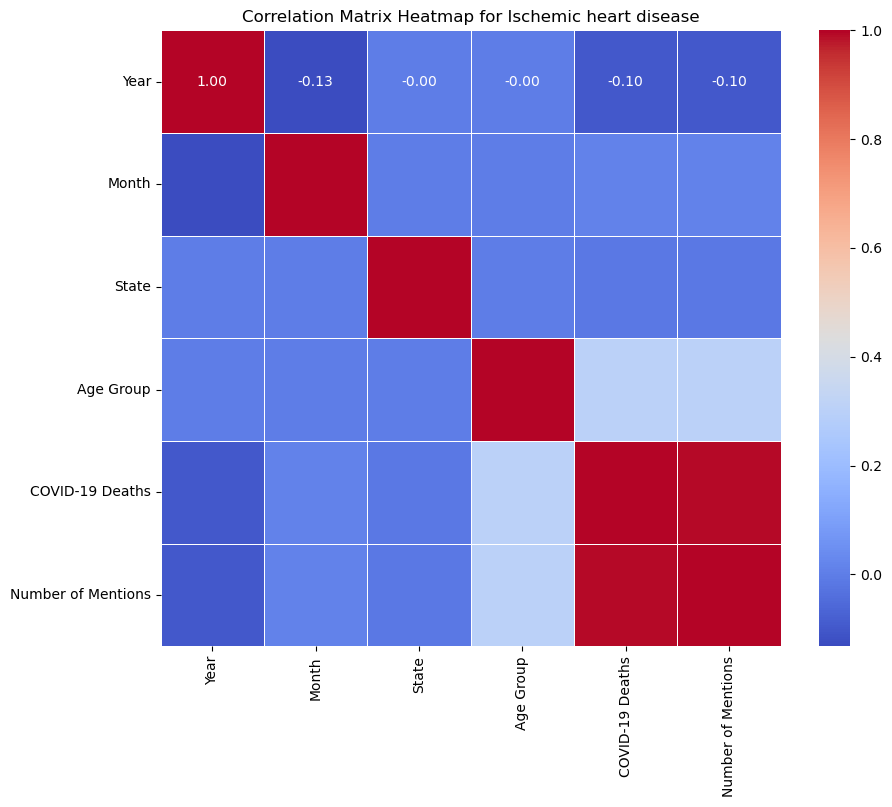

Correlation Matrix for Cardiac arrest:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -7.952065e-02 -1.005060e-02 -6.381528e-02  1.630325e-01   
Number of Mentions -7.936125e-02 -1.015393e-02 -6.385543e-02  1.625032e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.079521           -0.079361  
Month                     -0.010051           -0.010154  
State                     -0.063815           -0.063855  
Age Group                  0.163033            0.162503  
COVID-19 Deaths            1.000000            0.997875  
Number of Mentions         0.997875            1.000000   



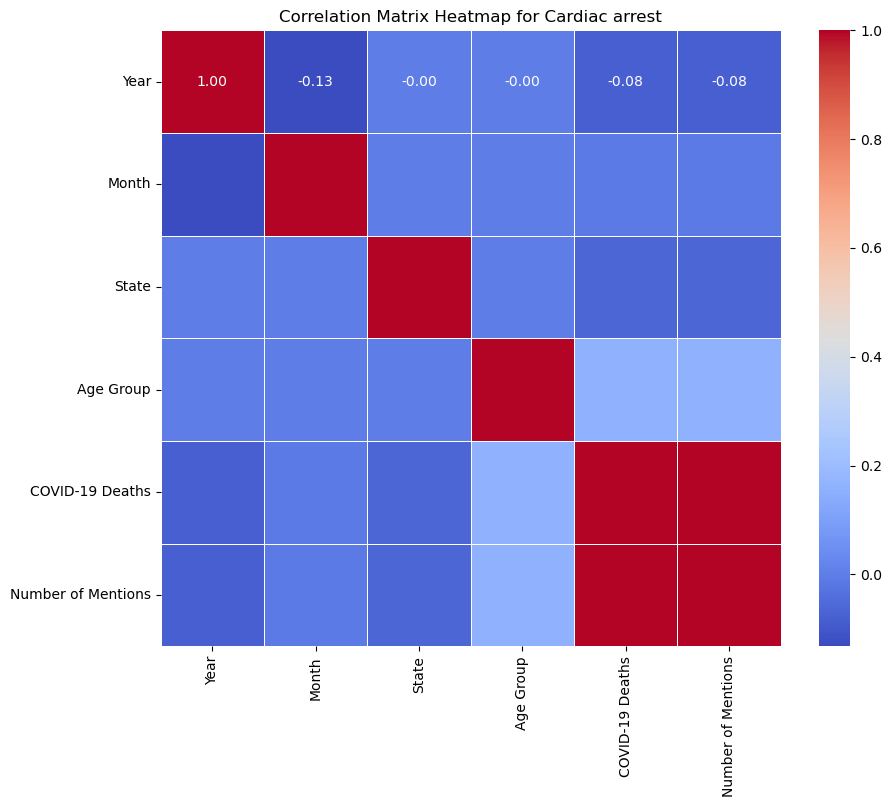

Correlation Matrix for Cardiac arrhythmia:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -8.101912e-02  1.286629e-02 -8.651882e-03  3.307968e-01   
Number of Mentions -8.148300e-02  1.210880e-02 -9.191625e-03  3.305127e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.081019           -0.081483  
Month                      0.012866            0.012109  
State                     -0.008652           -0.009192  
Age Group                  0.330797            0.330513  
COVID-19 Deaths            1.000000            0.991093  
Number of Mentions         0.991093            1.000000   



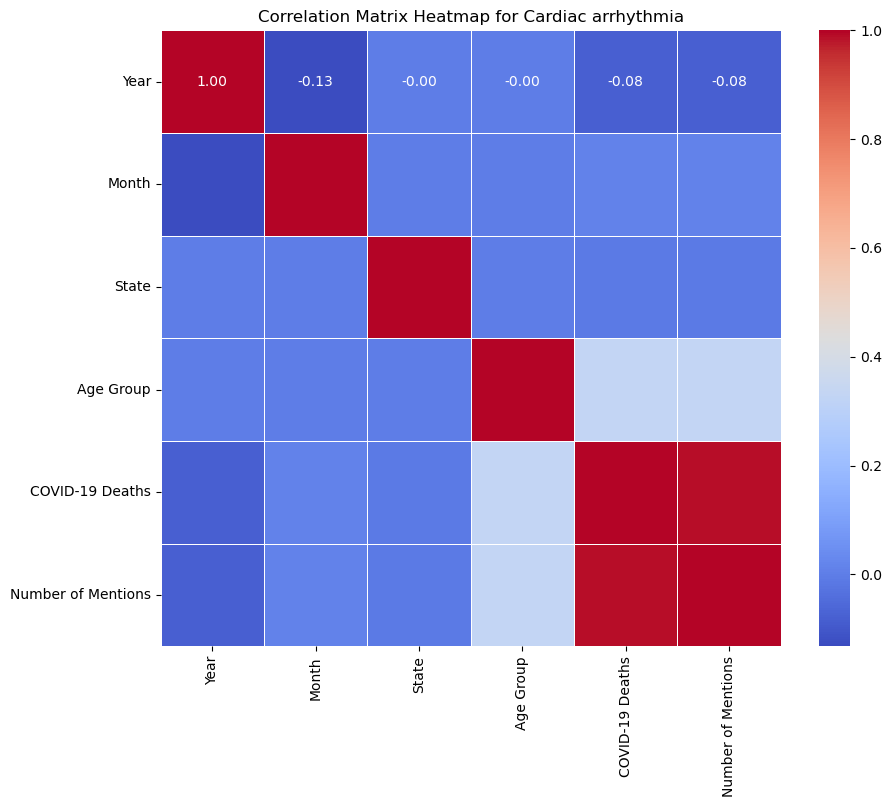

Correlation Matrix for Heart failure:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -7.623365e-02  7.932427e-03 -9.433447e-03  3.600951e-01   
Number of Mentions -7.541320e-02  6.840223e-03 -9.425663e-03  3.603167e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.076234           -0.075413  
Month                      0.007932            0.006840  
State                     -0.009433           -0.009426  
Age Group                  0.360095            0.360317  
COVID-19 Deaths            1.000000            0.990689  
Number of Mentions         0.990689            1.000000   



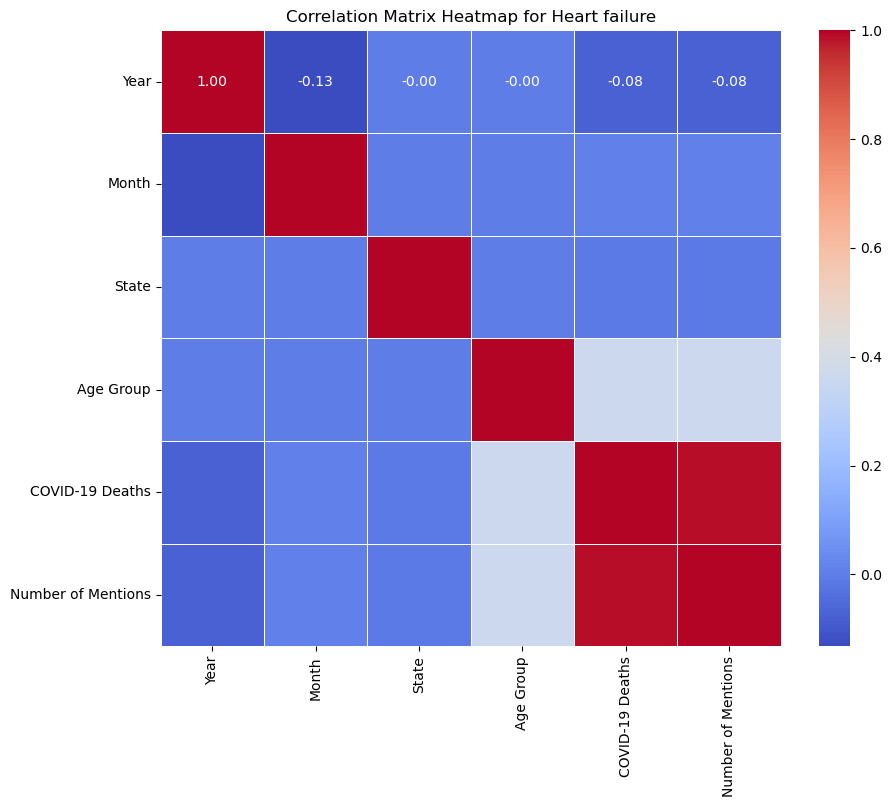

Correlation Matrix for Cerebrovascular diseases:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -8.693451e-02  9.880643e-03 -1.893321e-02  3.414062e-01   
Number of Mentions -8.773877e-02  8.969945e-03 -2.028837e-02  3.405752e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.086935           -0.087739  
Month                      0.009881            0.008970  
State                     -0.018933           -0.020288  
Age Group                  0.341406            0.340575  
COVID-19 Deaths            1.000000            0.974141  
Number of Mentions         0.974141            1.000000

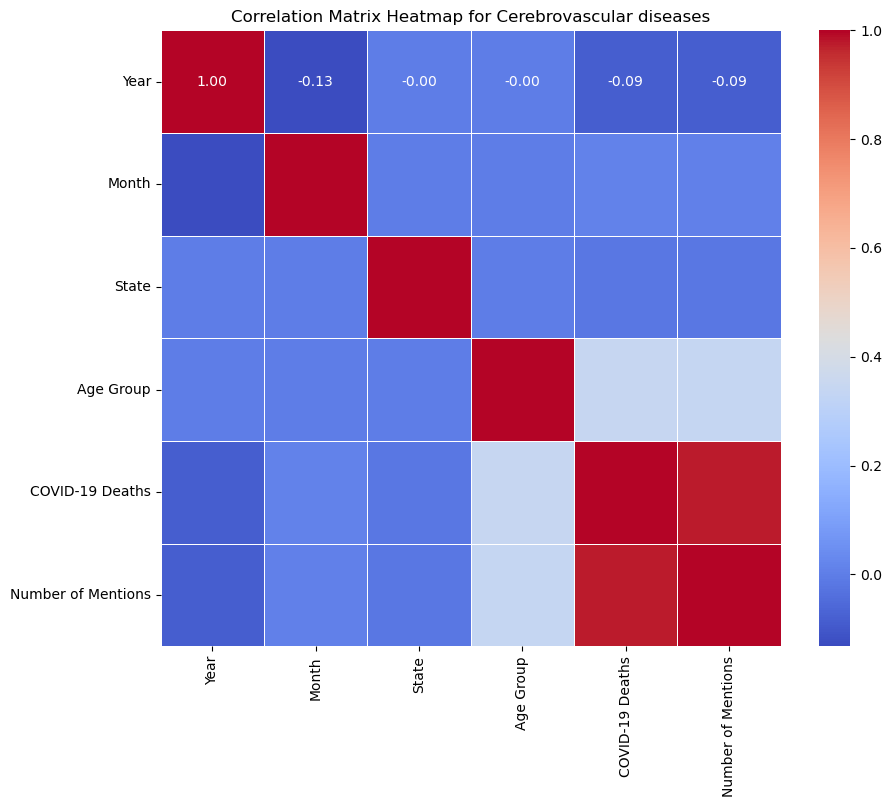

Correlation Matrix for Other diseases of the circulatory system:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -7.751440e-02  1.020288e-02 -1.401654e-02  3.067667e-01   
Number of Mentions -7.781244e-02  8.788163e-03 -1.266268e-02  3.068270e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.077514           -0.077812  
Month                      0.010203            0.008788  
State                     -0.014017           -0.012663  
Age Group                  0.306767            0.306827  
COVID-19 Deaths            1.000000            0.981372  
Number of Mentions         0.981372    

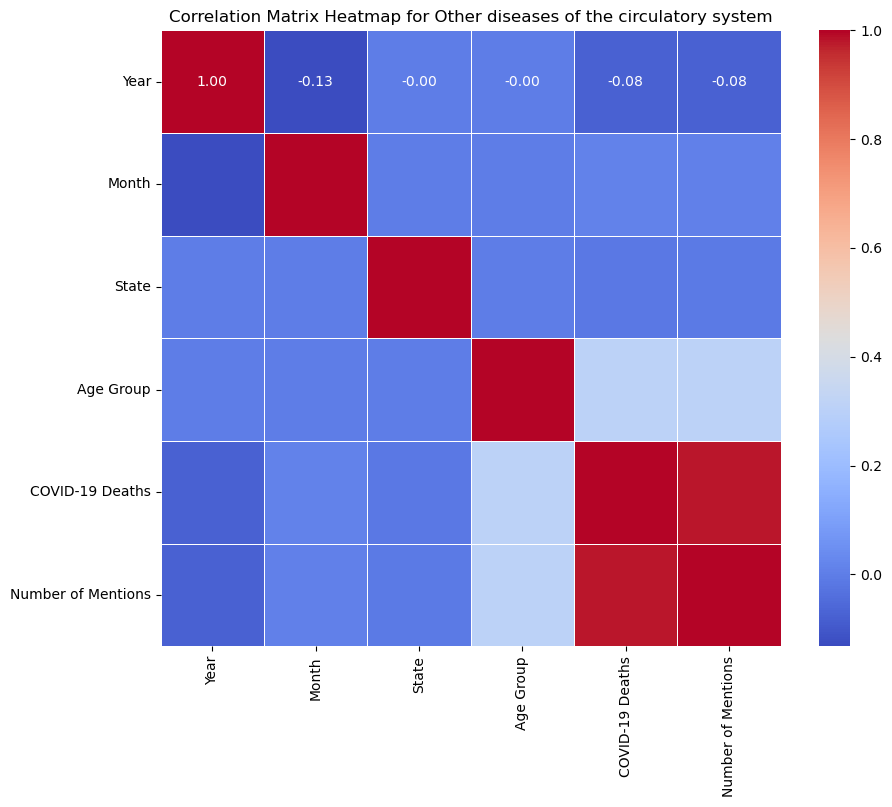

Correlation Matrix for Sepsis:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.024410e-01  9.104277e-03 -3.113366e-02  2.135024e-01   
Number of Mentions -1.015267e-01  1.005315e-02 -3.127787e-02  2.117619e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.102441           -0.101527  
Month                      0.009104            0.010053  
State                     -0.031134           -0.031278  
Age Group                  0.213502            0.211762  
COVID-19 Deaths            1.000000            0.993713  
Number of Mentions         0.993713            1.000000   



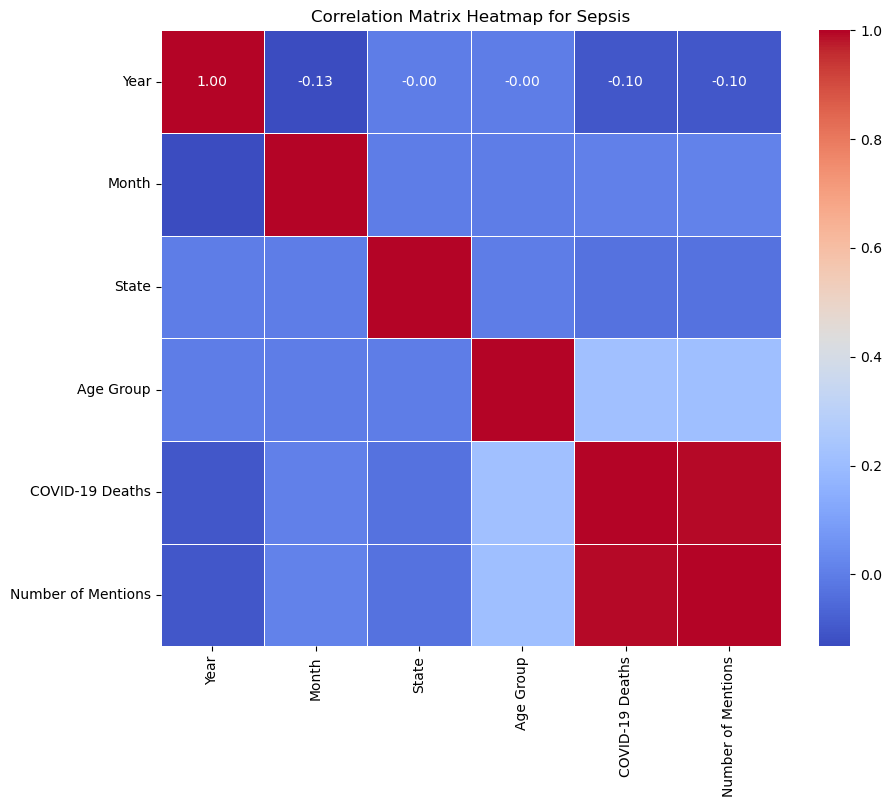

Correlation Matrix for Malignant neoplasms:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -3.525531e-02 -9.670423e-03 -2.165045e-02  3.429469e-01   
Number of Mentions -2.695022e-02 -1.340443e-02 -2.067560e-02  3.438464e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.035255           -0.026950  
Month                     -0.009670           -0.013404  
State                     -0.021650           -0.020676  
Age Group                  0.342947            0.343846  
COVID-19 Deaths            1.000000            0.971067  
Number of Mentions         0.971067            1.000000   



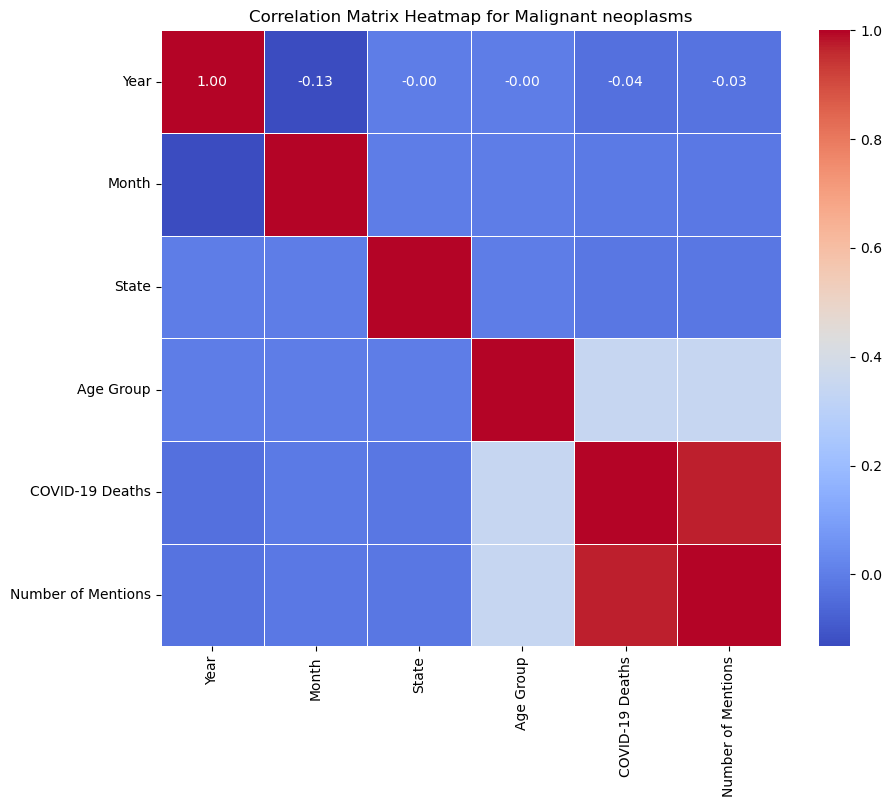

Correlation Matrix for Diabetes:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.244048e-01  1.292208e-02 -2.722822e-02  2.048795e-01   
Number of Mentions -1.242724e-01  1.271419e-02 -2.681350e-02  2.055985e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.124405           -0.124272  
Month                      0.012922            0.012714  
State                     -0.027228           -0.026813  
Age Group                  0.204880            0.205598  
COVID-19 Deaths            1.000000            0.997545  
Number of Mentions         0.997545            1.000000   



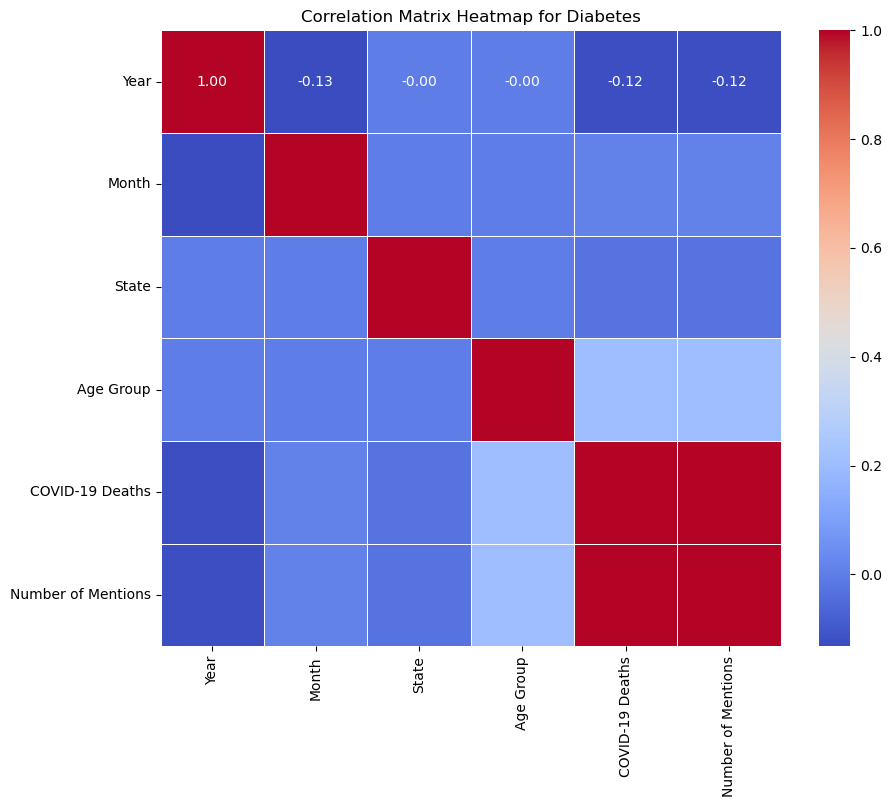

Correlation Matrix for Obesity:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.311297e-01  5.456053e-02 -1.068210e-02  6.572056e-02   
Number of Mentions -1.324060e-01  5.415737e-02 -1.229516e-02  6.717759e-02   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.131130           -0.132406  
Month                      0.054561            0.054157  
State                     -0.010682           -0.012295  
Age Group                  0.065721            0.067178  
COVID-19 Deaths            1.000000            0.973123  
Number of Mentions         0.973123            1.000000   



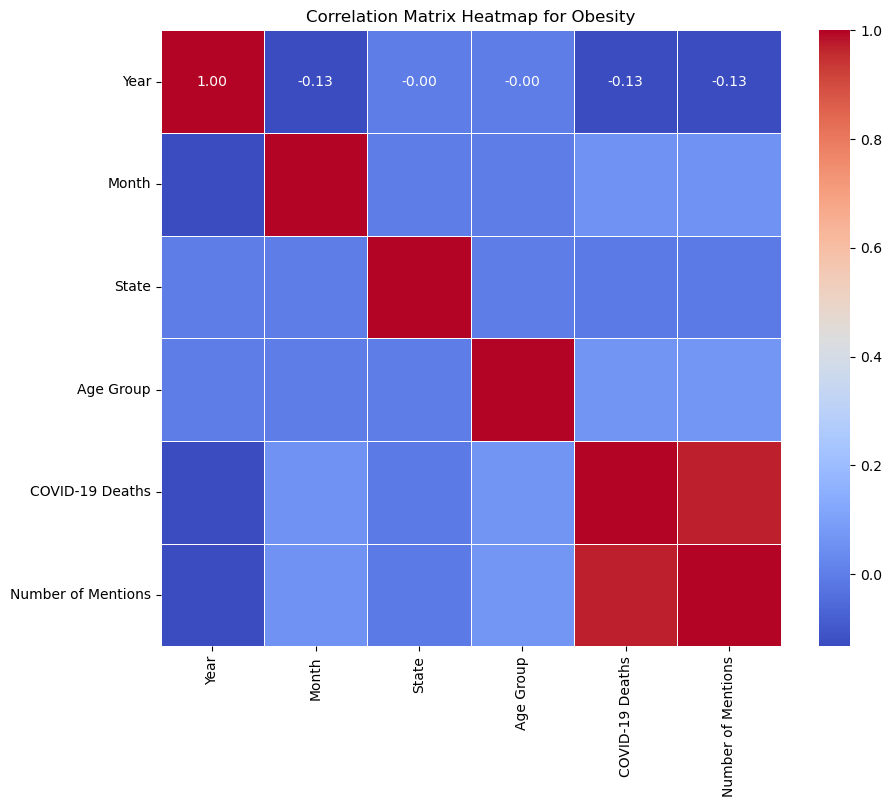

Correlation Matrix for Alzheimer disease:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -8.226264e-02  2.351892e-02 -1.101130e-02  3.081834e-01   
Number of Mentions -8.206104e-02  2.221199e-02 -1.016816e-02  3.083766e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.082263           -0.082061  
Month                      0.023519            0.022212  
State                     -0.011011           -0.010168  
Age Group                  0.308183            0.308377  
COVID-19 Deaths            1.000000            0.984964  
Number of Mentions         0.984964            1.000000   



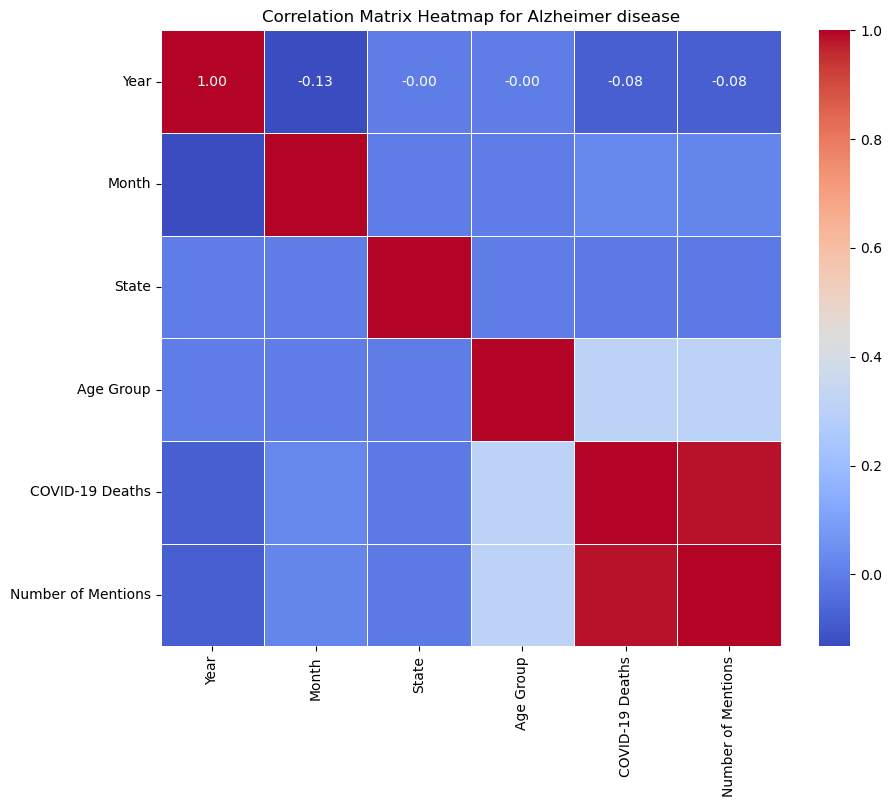

Correlation Matrix for Vascular and unspecified dementia:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.032452e-01  1.309783e-02 -6.457670e-03  3.031017e-01   
Number of Mentions -1.026203e-01  1.380219e-02 -6.686938e-03  3.039764e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.103245           -0.102620  
Month                      0.013098            0.013802  
State                     -0.006458           -0.006687  
Age Group                  0.303102            0.303976  
COVID-19 Deaths            1.000000            0.996959  
Number of Mentions         0.996959           

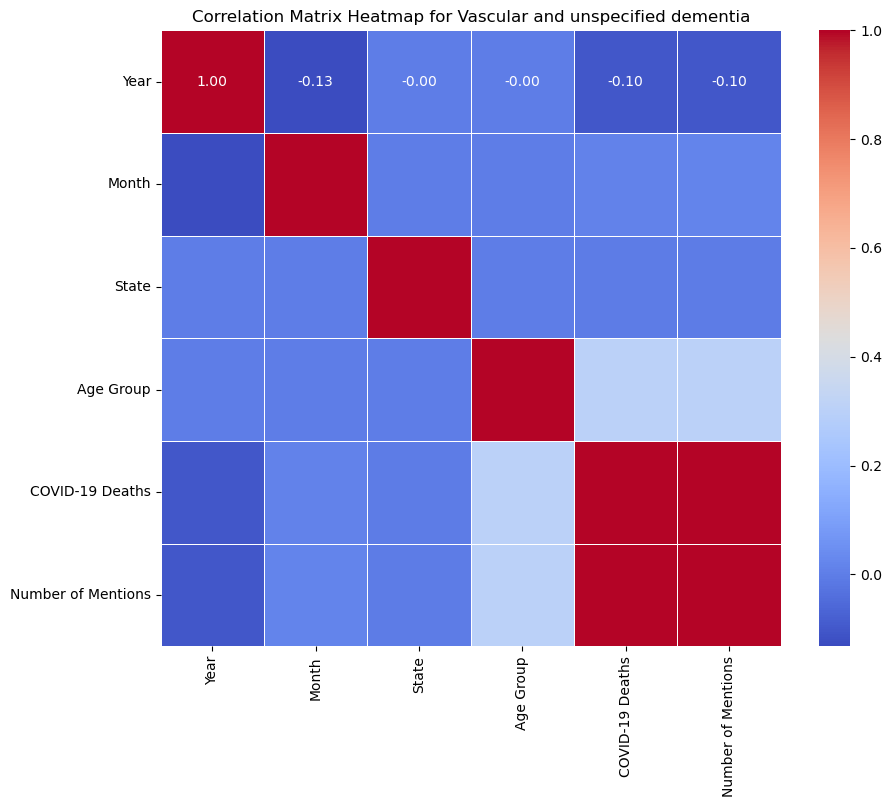

Correlation Matrix for Renal failure:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -9.205860e-02 -5.744182e-04 -1.117463e-02  2.429162e-01   
Number of Mentions -9.137015e-02 -1.690296e-03 -1.006412e-02  2.449101e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.092059           -0.091370  
Month                     -0.000574           -0.001690  
State                     -0.011175           -0.010064  
Age Group                  0.242916            0.244910  
COVID-19 Deaths            1.000000            0.994428  
Number of Mentions         0.994428            1.000000   



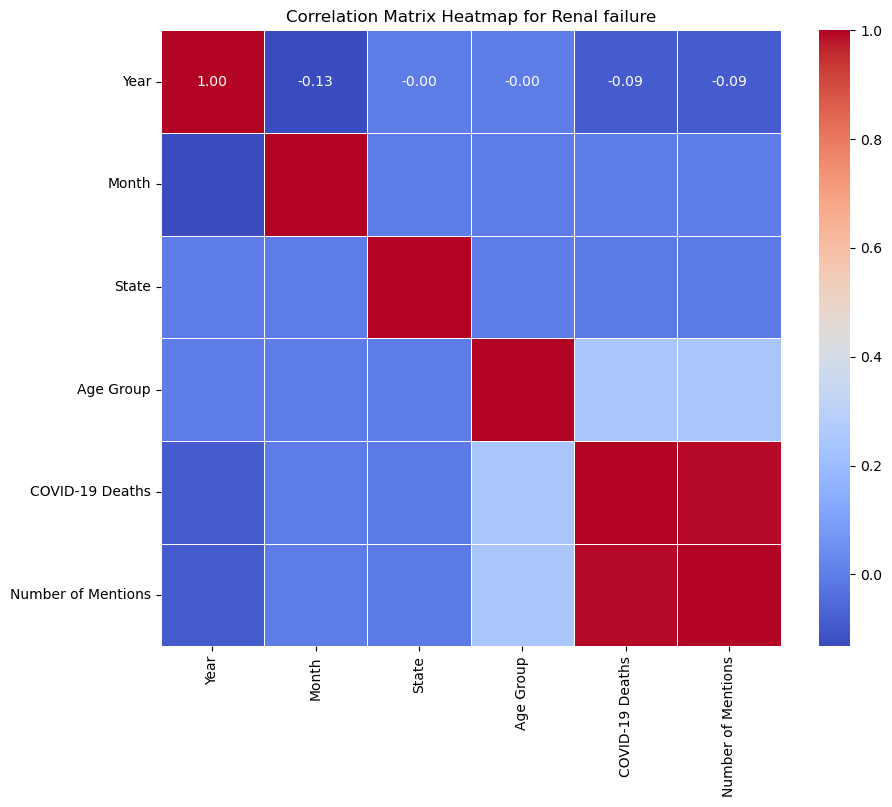

Correlation Matrix for Intentional and unintentional injury, poisoning, and other adverse events:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -4.635916e-02 -1.262328e-03 -1.782204e-02  2.941779e-01   
Number of Mentions -5.074009e-02 -1.230116e-02 -2.258451e-02  2.831949e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.046359           -0.050740  
Month                     -0.001262           -0.012301  
State                     -0.017822           -0.022585  
Age Group                  0.294178            0.283195  
COVID-19 Deaths            1.000000            0.872955  
Number

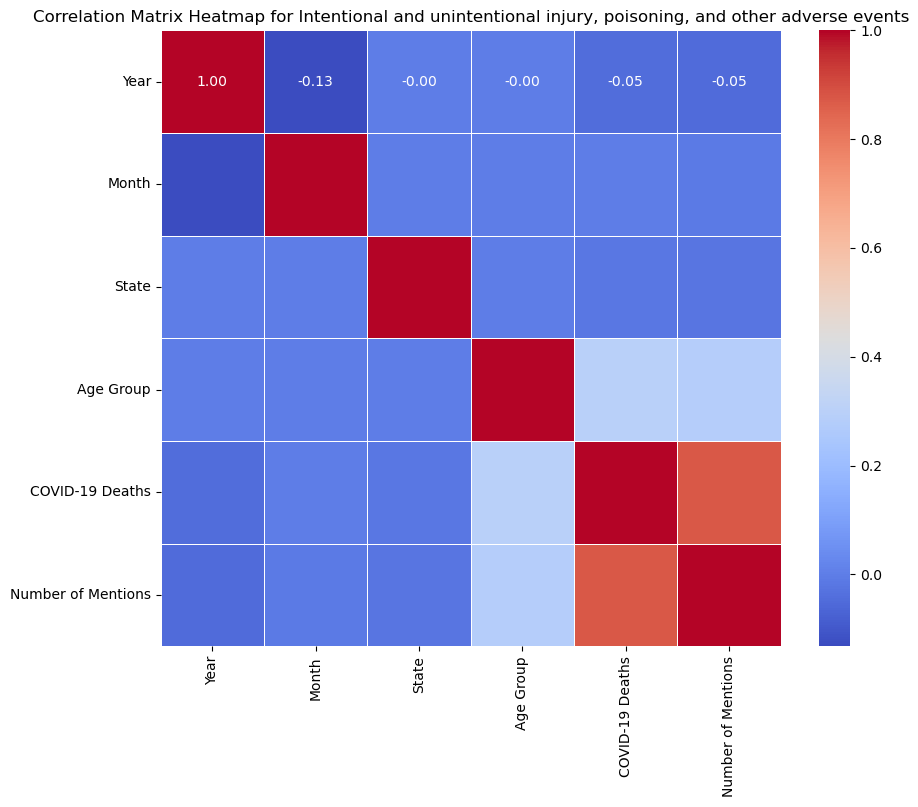

Correlation Matrix for All other conditions and causes (residual):
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.148455e-01  1.695135e-02 -7.150417e-03  2.976011e-01   
Number of Mentions -1.080310e-01  1.583245e-02  2.181533e-03  3.080107e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.114846           -0.108031  
Month                      0.016951            0.015832  
State                     -0.007150            0.002182  
Age Group                  0.297601            0.308011  
COVID-19 Deaths            1.000000            0.995458  
Number of Mentions         0.995458  

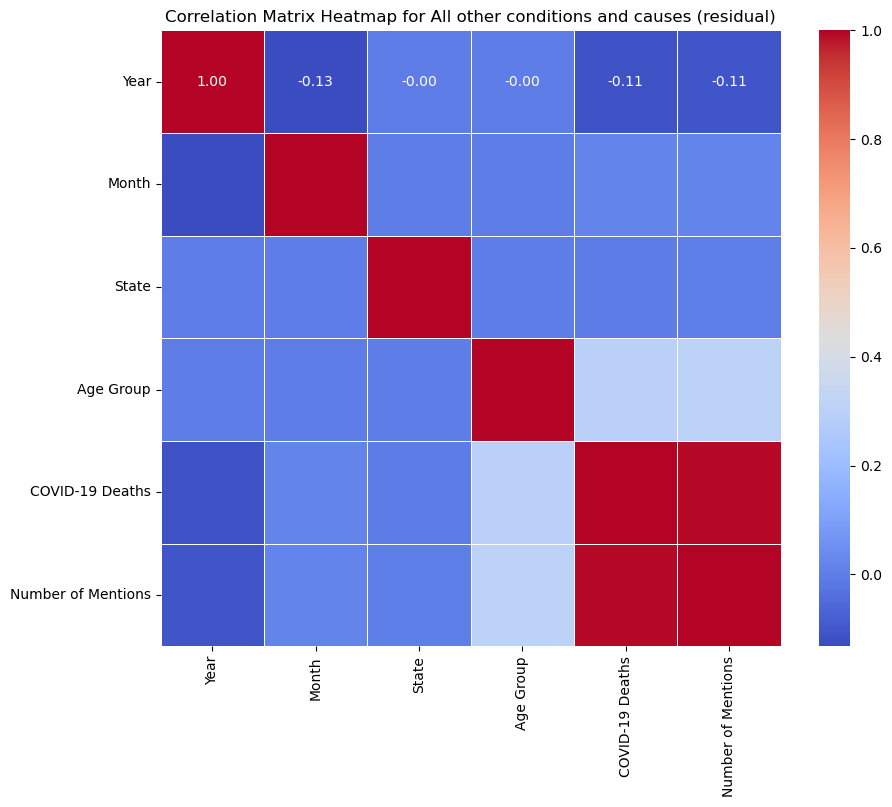

Correlation Matrix for COVID-19:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -2.766214e-13 -1.856374e-14   
Month              -1.322529e-01  1.000000e+00 -7.387414e-15 -1.161731e-16   
State              -2.766214e-13 -7.387414e-15  1.000000e+00 -9.038583e-16   
Age Group          -1.856374e-14 -1.161731e-16 -9.038583e-16  1.000000e+00   
COVID-19 Deaths    -1.292954e-01  1.483706e-02 -2.075122e-02  2.685168e-01   
Number of Mentions -1.293291e-01  1.487116e-02 -2.079425e-02  2.684508e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.129295           -0.129329  
Month                      0.014837            0.014871  
State                     -0.020751           -0.020794  
Age Group                  0.268517            0.268451  
COVID-19 Deaths            1.000000            0.999938  
Number of Mentions         0.999938            1.000000   



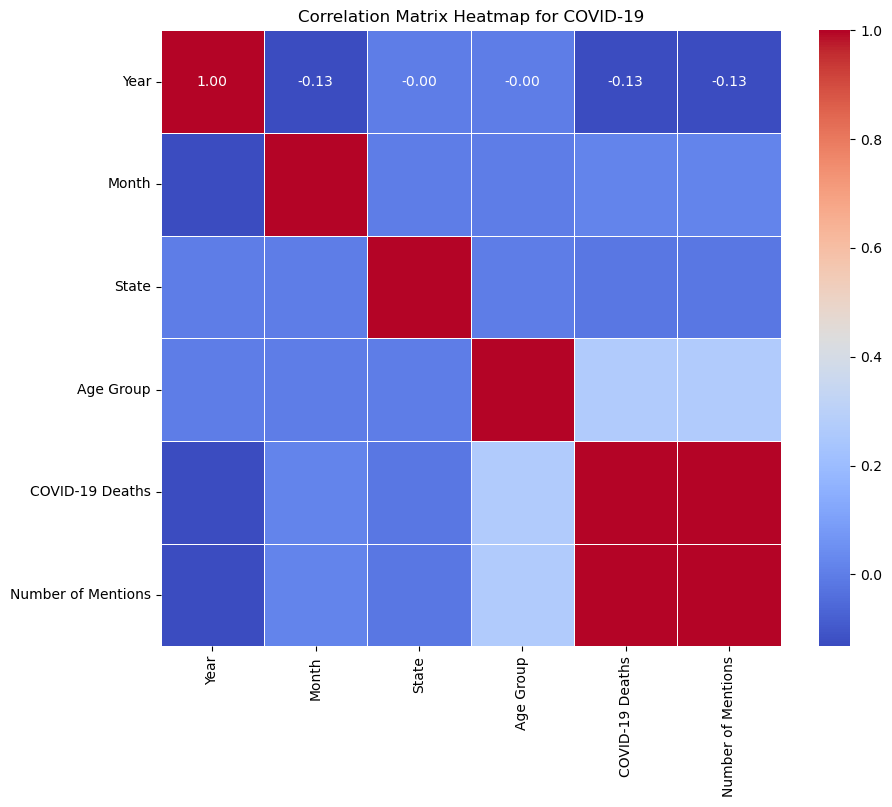

In [14]:
# Use a "for loop" to calculate the correlations for each condition and then print them along with their heatmap
for condition in conditions:
    df_condition = df_selected[df_selected['Condition'] == condition]
    df_condition_encoded = df_encoded[df_selected['Condition'] == condition]
    if df_condition_encoded.shape[0] > 1:
        numeric_df = df_condition_encoded.select_dtypes(include=[np.number])
        numeric_df = numeric_df.loc[:, numeric_df.var() != 0.0]
        corr_matrix = numeric_df.corr()
        
        # Print the correlation matrix for each condition
        print(f'Correlation Matrix for {condition}:\n', corr_matrix, '\n')
        
        # Plot the heatmap for each condition
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title(f'Correlation Matrix Heatmap for {condition}')
        heatmap_condition = plt.gcf()
        plt.show()

# Export the heatmaps
    heatmap_condition.savefig(os.path.join(path, '04 Analysis', 'Visualizations', f'heatmap_corr_matrix_{condition.replace(" ", "_").lower()}.png'))

##  Based on the correlation matrix above, here are the top 10 strongest positive correlations observed for specific conditions:
### Influenza and pneumonia 
    COVID-19 Deaths and Number of Mentions: 0.999626 
### Vascular and unspecified dementia
    COVID-19 Deaths and Number of Mentions: 0.996976
### Diabetes
    COVID-19 Deaths and Number of Mentions: 0.997558 
### Cardiac arrest
    COVID-19 Deaths and Number of Mentions: 0.997773
### Ischemic heart disease
    COVID-19 Deaths and Number of Mentions: 0.994943 
### Renal failure
    COVID-19 Deaths and Number of Mentions: 0.994433 
### Adult respiratory distress syndrome
    COVID-19 Deaths and Number of Mentions: 0.993904 
### Cardiac arrhythmia
    COVID-19 Deaths and Number of Mentions: 0.991309
### Heart failure
    COVID-19 Deaths and Number of Mentions: 0.990561
### Cerebrovascular diseases
    COVID-19 Deaths and Number of Mentions: 0.974710

## Here are the variables with the strongest negative correlations to specific conditions:
### Adult respiratory distress syndrome
    COVID-19 Deaths and Year: -0.165417
    Number of Mentions and Year: -0.165158
### Obesity
    COVID-19 Deaths and Year: -0.133163
    Number of Mentions and Year: -0.131415
### COVID-19
    COVID-19 Deaths and Year: -0.129252 
    Number of Mentions and Year: -0.129271 
### Diabetes
    COVID-19 Deaths and Year: -0.124168
    Number of Mentions and Year: -0.124676 
### Influenza and pneumonia
    COVID-19 Deaths and Year: -0.123857 
    Number of Mentions and Year: -0.123570
### Renal failure
    COVID-19 Deaths and Year: -0.092286 
    Number of Mentions and Year: -0.091363 
### Cerebrovascular diseases
    COVID-19 Deaths and Year: -0.087365 
    Number of Mentions and Year: -0.085845 
### Alzheimer disease
    COVID-19 Deaths and Year: -0.083226 
    Number of Mentions and Year: -0.083863
### Cardiac arrhythmia
    COVID-19 Deaths and Year: -0.081028 
    Number of Mentions and Year: -0.080067 
### Other diseases of the circulatory system
    COVID-19 Deaths and Year: -0.079294 
    Number of Mentions and Year: -0.076081

### Insights into the Correlation of the Column Variabless
    A very strong positive correlation between COVID-19 Deaths and Number of Mentions (0.99) indicates that higher mentions of COVID-19-related conditions correspond closely to increased deaths. The moderate positive correlation between Condition and Condition Group (0.65) suggests that specific medical conditions are consistently categorized within their groups.

### Insights into the Correlations of Specific Medical Conditions in the "Condition" Variable
    Specific medical conditions exhibit very strong correlations with COVID-19 Deaths, particularly with the Number of Mentions. Conditions like influenza and pneumonia, vascular and unspecified dementia, and diabetes show correlations of 0.99 or higher, suggesting that mentions in medical records are reliable indicators of COVID-19's impact. Moderate positive correlations with Age Group for conditions such as ischemic heart disease (0.30) and cerebrovascular diseases (0.34) highlight the increased vulnerability of older populations. Weak negative correlations with the year for some conditions suggest a slight decrease in COVID-19's impact over time, likely due to better management and treatment strategies.

# 4. Creating Scatterplots

### First, I will create scatterplots of the strongest correlations among the columns, then I will focus on the scatterplots for specific medical conditions.

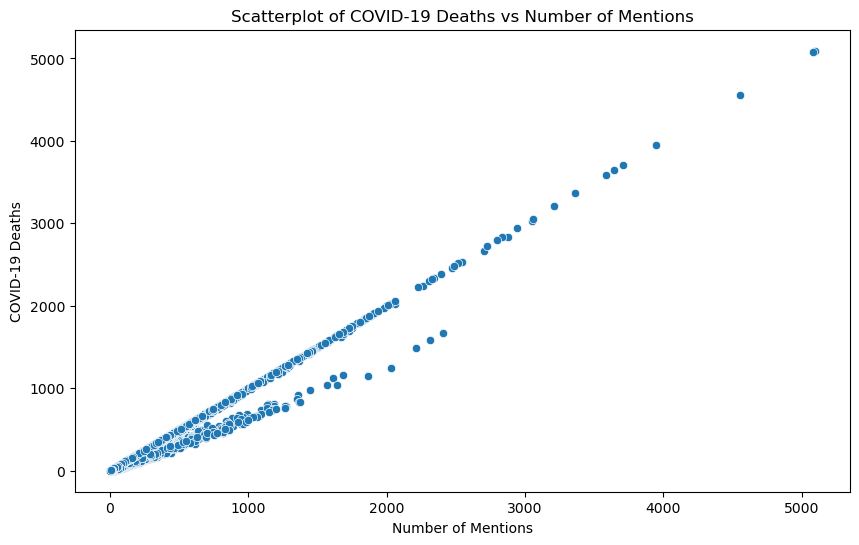

In [15]:
# Scatterplot for COVID-19 Deaths and Number of Mentions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Number of Mentions', y='COVID-19 Deaths')
plt.title('Scatterplot of COVID-19 Deaths vs Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_mentions_deaths = plt.gcf()
plt.show()

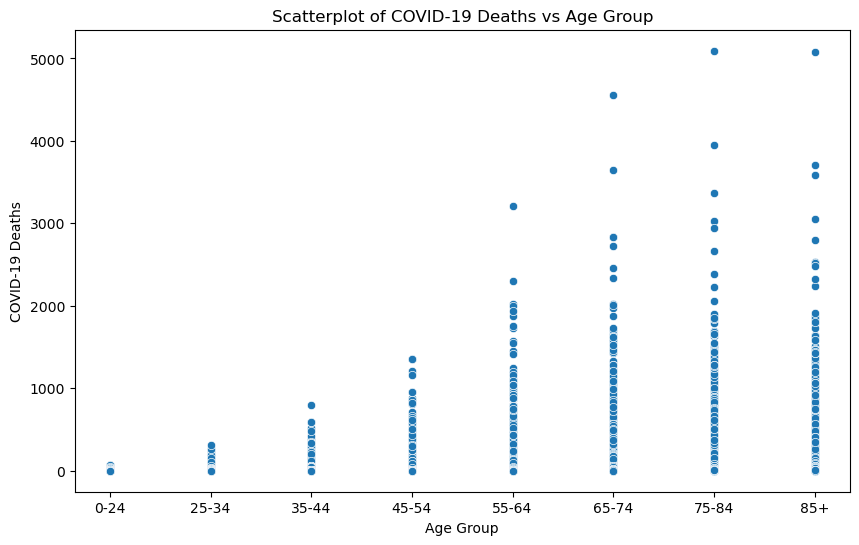

In [16]:
# Scatterplot for Age Group and COVID-19 Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Age Group', y='COVID-19 Deaths')
plt.title('Scatterplot of COVID-19 Deaths vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
scatterplot_agegroup_deaths = plt.gcf()
plt.show()

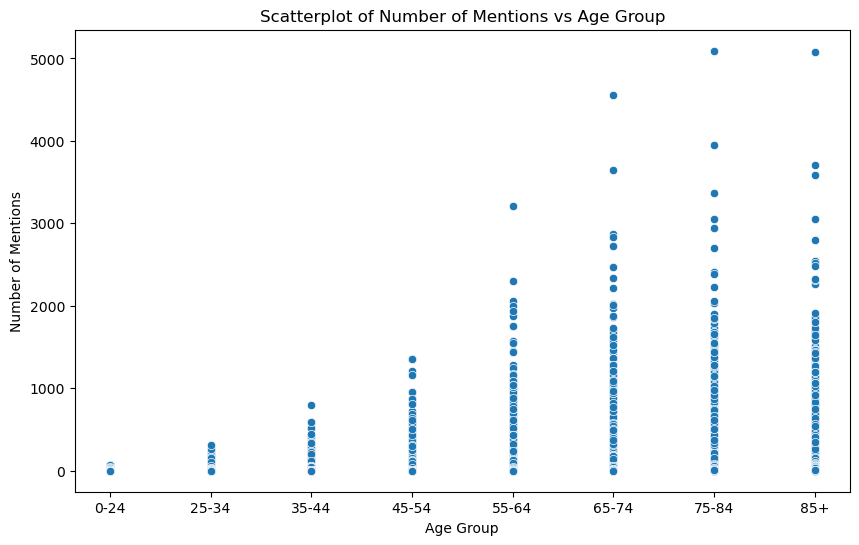

In [17]:
# Scatterplot for Age Group and Number of Mentions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Age Group', y='Number of Mentions')
plt.title('Scatterplot of Number of Mentions vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Mentions')
scatterplot_mentions_agegroup = plt.gcf()
plt.show()

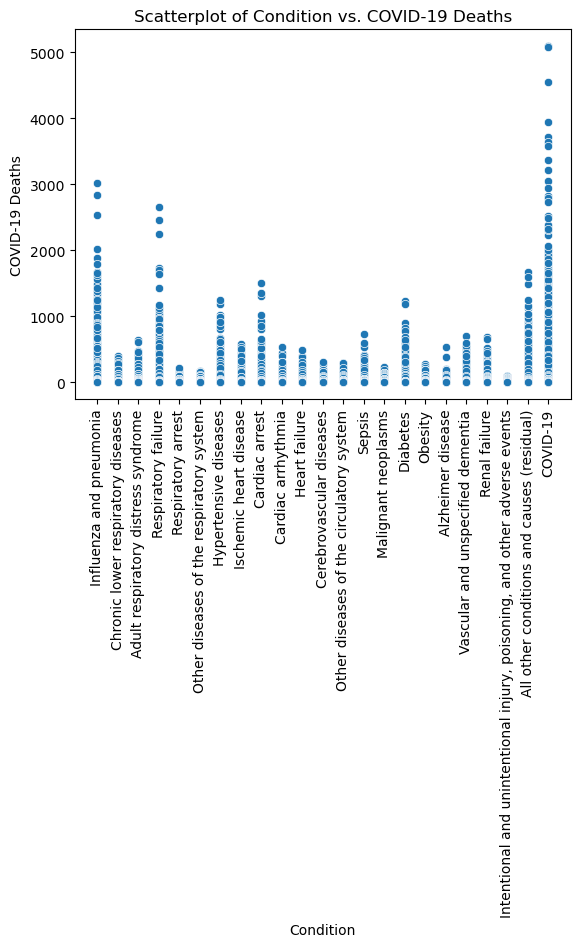

In [18]:
# Scatterplot for Condtion and COVID-19 Deaths
sns.scatterplot(data=df_selected, x='Condition', y='COVID-19 Deaths')
plt.title('Scatterplot of Condition vs. COVID-19 Deaths')
plt.xlabel('Condition')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=90)
scatterplot_condition_deaths = plt.gcf()
plt.show()

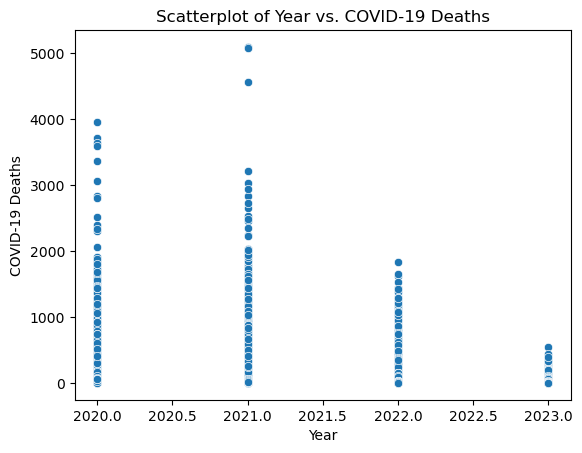

In [19]:
# Scatterplot for Year and COVID-19 Deaths
sns.scatterplot(data=df_selected, x='Year', y='COVID-19 Deaths')
plt.title('Scatterplot of Year vs. COVID-19 Deaths')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_year_deaths = plt.gcf()
plt.show()

### Creating scatterplots for the top 5 positive correlations for medical conditions

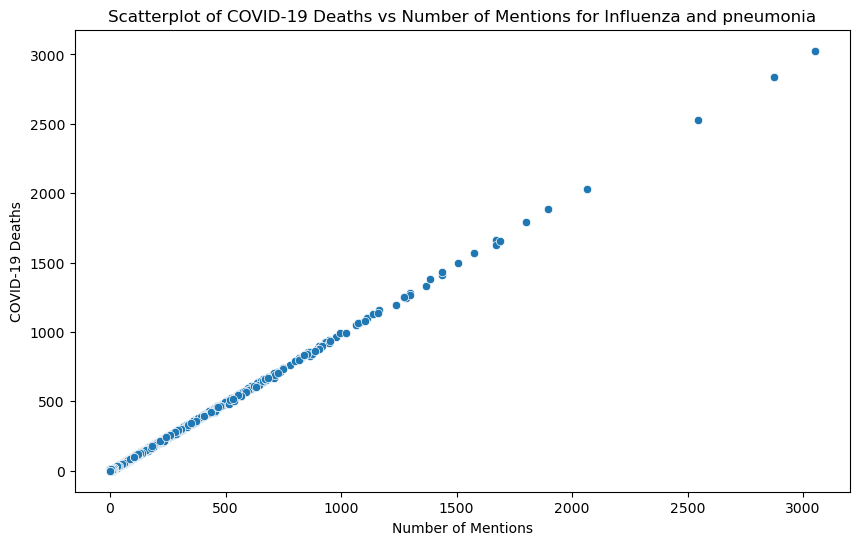

In [20]:
# Scatterplot for Influenza and pneumonia
condition = 'Influenza and pneumonia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_influenza_pneumonia = plt.gcf()
plt.show()

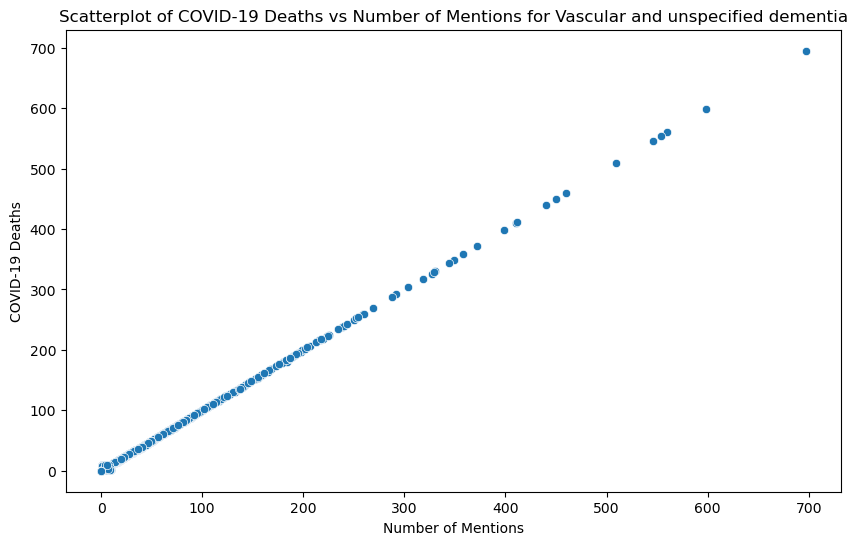

In [21]:
# Scatterplot for Vascular and unspecified dementia
condition = 'Vascular and unspecified dementia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_vascular_dementia = plt.gcf()
plt.show()

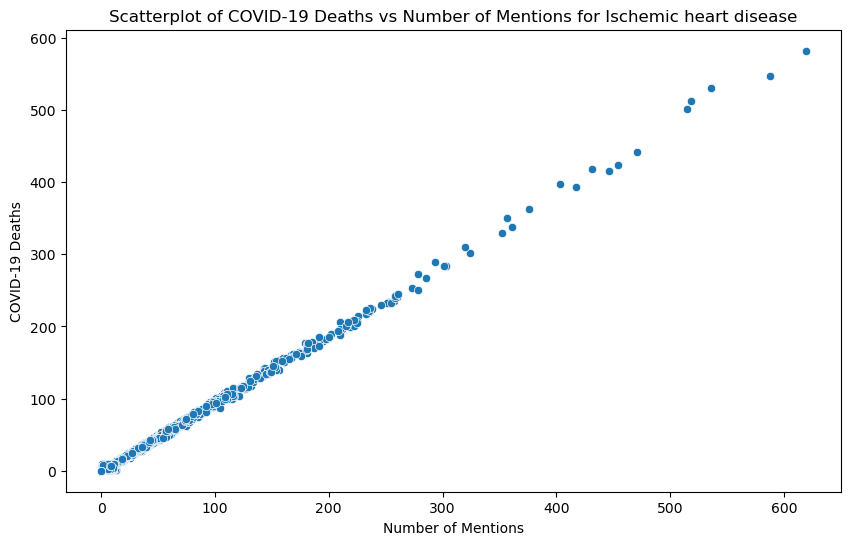

In [22]:
# Scatterplot for Ischemic heart disease
condition = 'Ischemic heart disease'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_ischemic_heart_disease = plt.gcf()
plt.show()

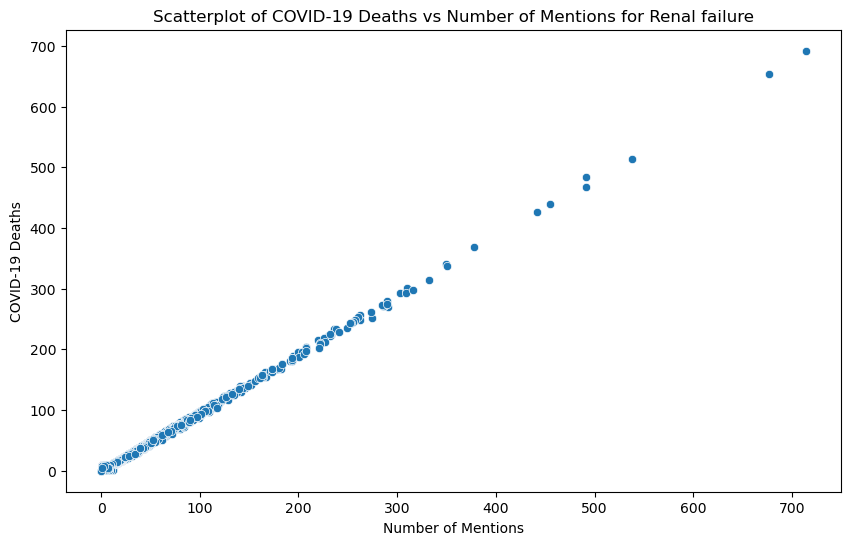

In [23]:
# Scatterplot for Renal failure
condition = 'Renal failure'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_renal_failure = plt.gcf()
plt.show()

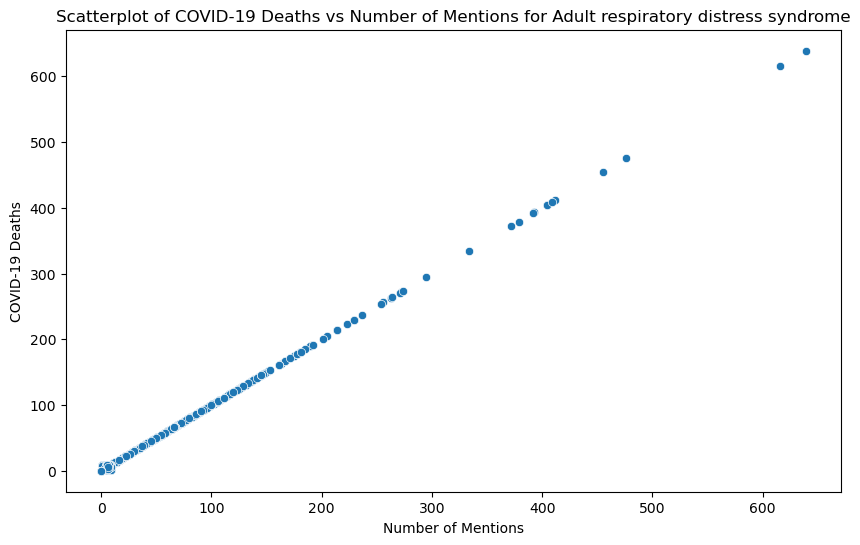

In [24]:
# Scatterplot for Adult respiratory distress syndrome
condition = 'Adult respiratory distress syndrome'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_respiratory_distress = plt.gcf()
plt.show()

### Creating scatterpots for the top 5 negative correlations for medical conditions

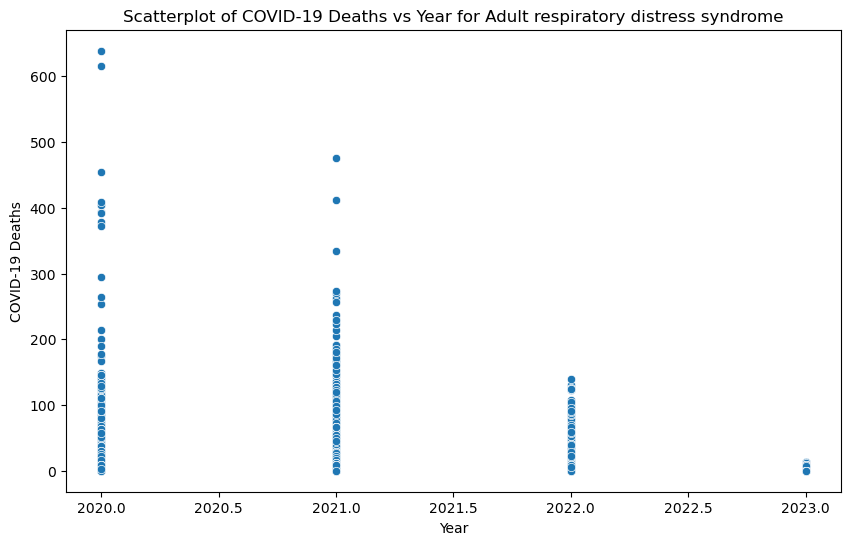

In [25]:
# Scatterplot for Adult respiratory distress syndrome - COVID-19 Deaths and Year
condition = 'Adult respiratory distress syndrome'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_respiratory_distress_year = plt.gcf()
plt.show()

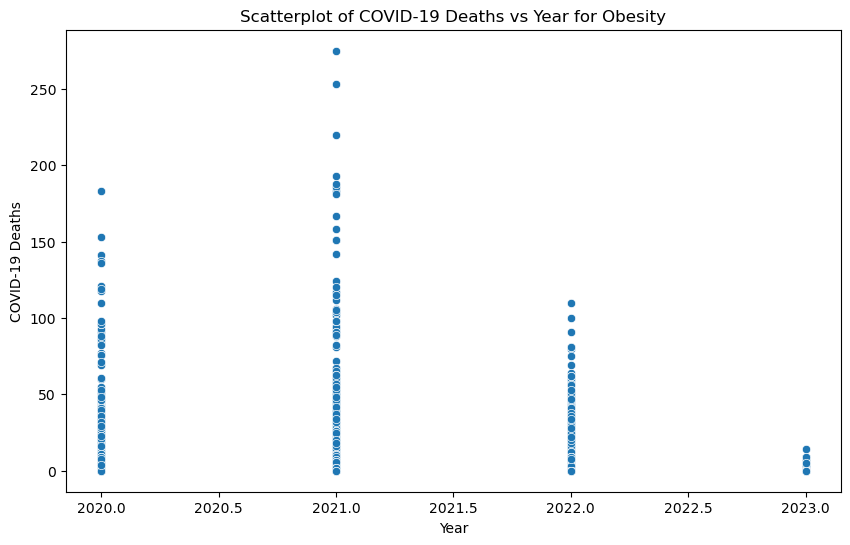

In [26]:
# Scatterplot for Obesity - COVID-19 Deaths and Year
condition = 'Obesity'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_obesity_year = plt.gcf()
plt.show()

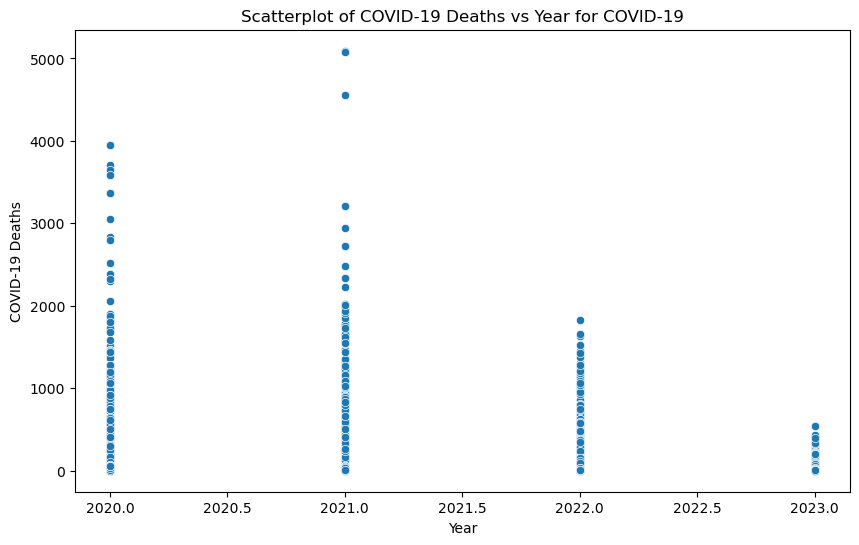

In [27]:
# Scatterplot for COVID-19 - COVID-19 Deaths and Year
condition = 'COVID-19'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_covid19_year = plt.gcf()
plt.show()

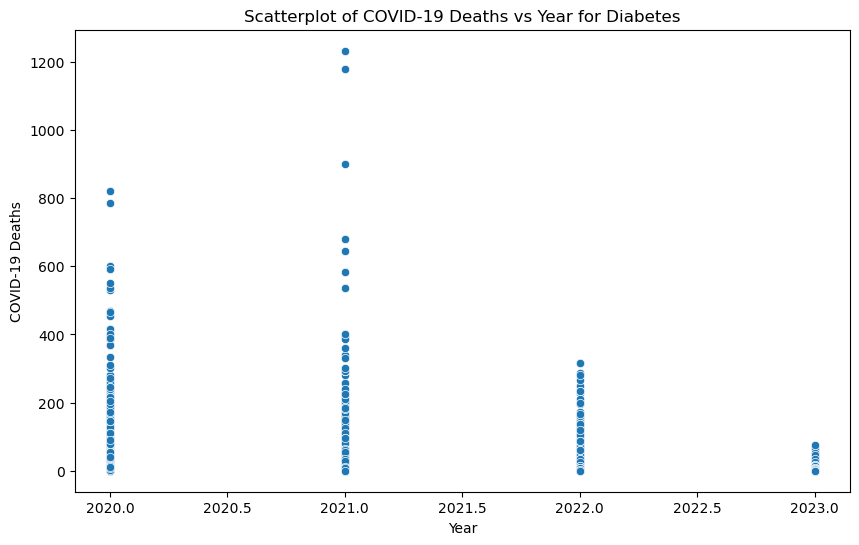

In [28]:
# Scatterplot for Diabetes - COVID-19 Deaths and Year
condition = 'Diabetes'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_diabetes_year = plt.gcf()
plt.show()

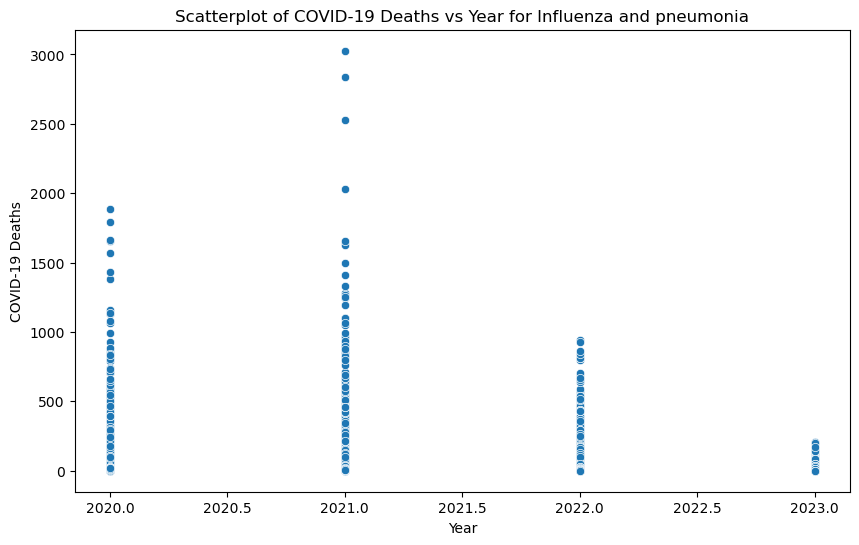

In [29]:
# Scatterplot for Influenza and pneumonia - COVID-19 Deaths and Year
condition = 'Influenza and pneumonia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_influenza_year = plt.gcf()
plt.show()

### Insights from the Scatterplot Analysis
    The scatterplot of COVID-19 Deaths vs. Number of Mentions shows a clear positive relationship, as expected based on the strong correlation observed in the correlation matrix. The scatterplots for Age Group vs. COVID-19 Deaths and Age Group vs. Number of Mentions illustrate the impact of age on COVID-19 outcomes. There is a noticeable trend that older age groups tend to have higher death counts and mentions, indicating that older populations are more severely affected by COVID-19. Additionally, the scatterplot of Year vs. COVID-19 Deaths indicates a potential temporal trend, where deaths might show variability over time, possibly reflecting the impact of interventions, treatments, and public health measures introduced during the pandemic.

    The scatterplots for specific medical conditions offer additional insights into how these conditions correlate with COVID-19 Deaths and other variables. The scatterplot of COVID-19 Deaths vs. Number of Mentions for conditions like influenza and pneumonia, vascular and unspecified dementia, and ischemic heart disease shows a strong positive relationship indicating that higher mentions of these conditions are closely associated with higher COVID-19 death counts, reflecting their significant impact when comorbid with COVID-19. Scatterplots for COVID-19 Deaths vs. Year for conditions such as obesity and diabetes reveal weak negative trends, suggesting a slight decrease in deaths over time. This again is likely an indication of improved management or treatment of these conditions as the pandemic progressed. The scatterplot for COVID-19 Deaths vs. Age Group for conditions like cardiac arrest and renal failure shows that older age groups have higher death counts, again emphasizing the higher vulnerability of older populations with these comorbidities.

# 5. Creating a Pair Plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

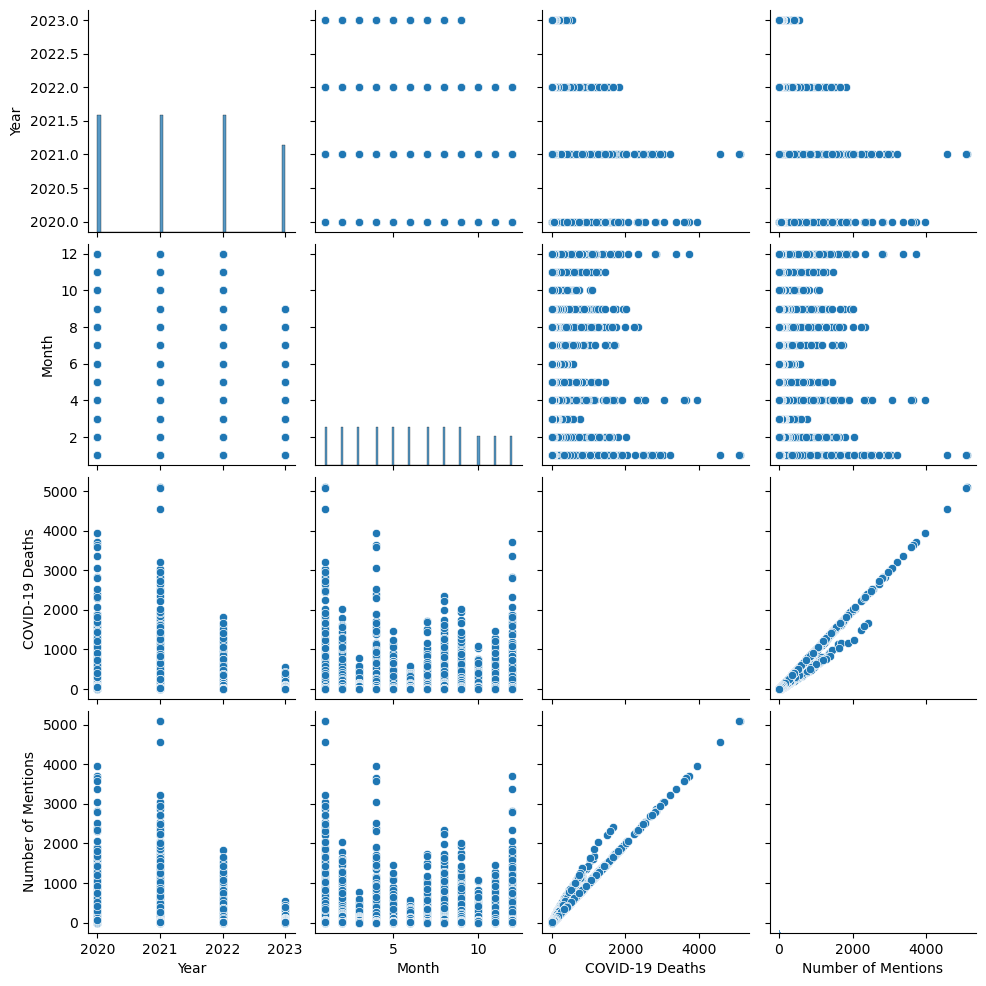

In [30]:
# Create a Pair Plot of the entire dataset
sns.pairplot(df)
pair_plot_entire_dataset = plt.gcf()
plt.show()

### I will also create pair plots for specific medical conditions from the "Condition" column 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


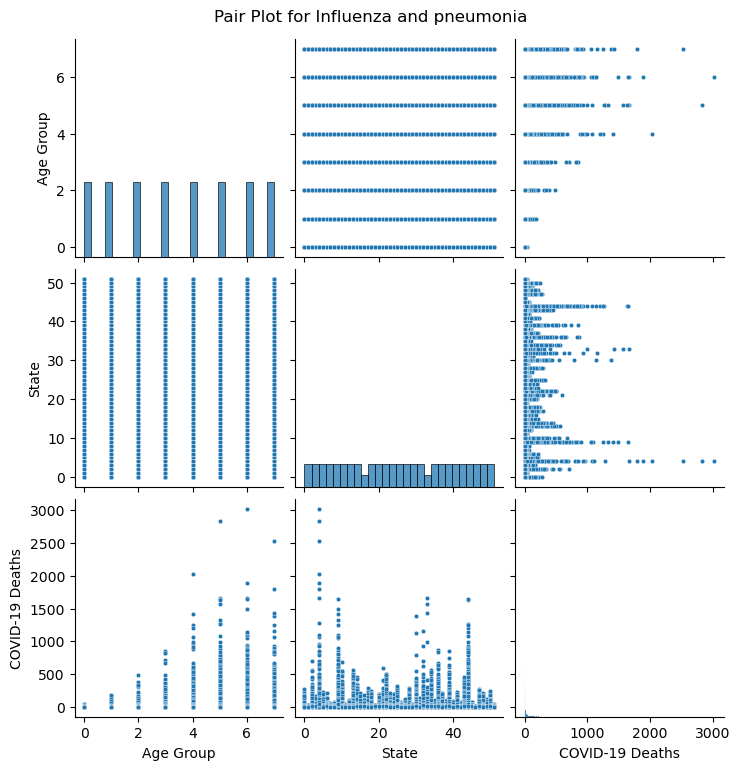

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


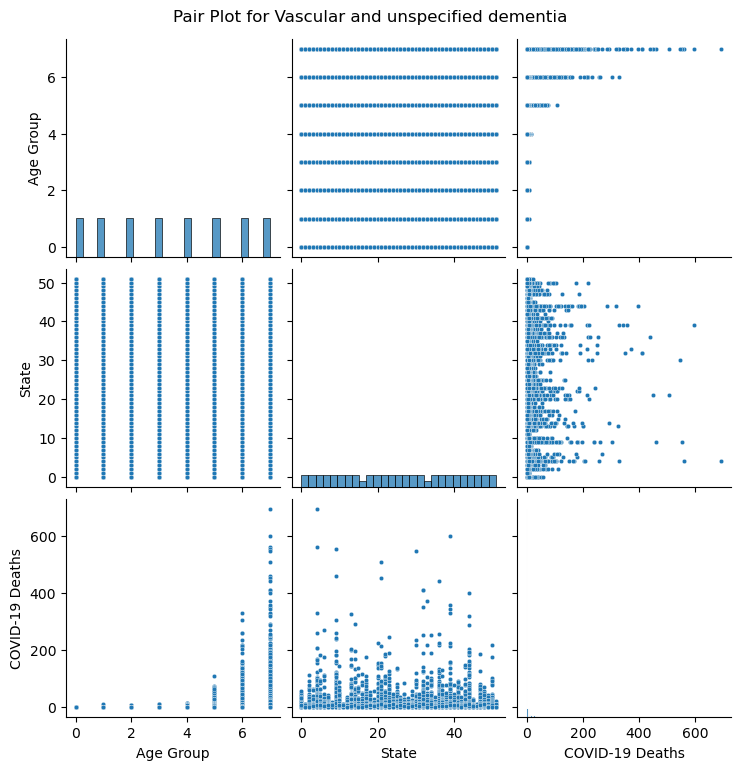

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


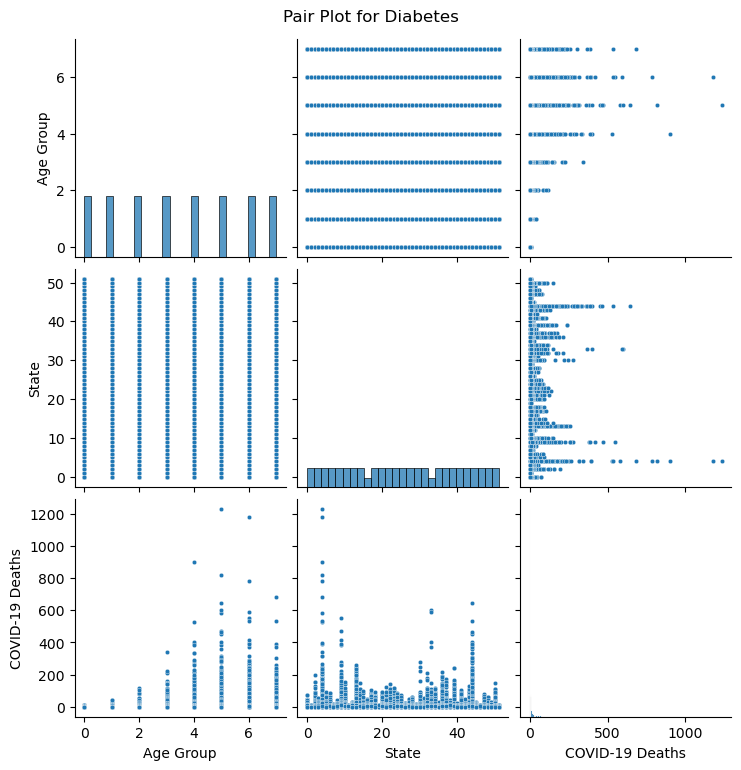

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


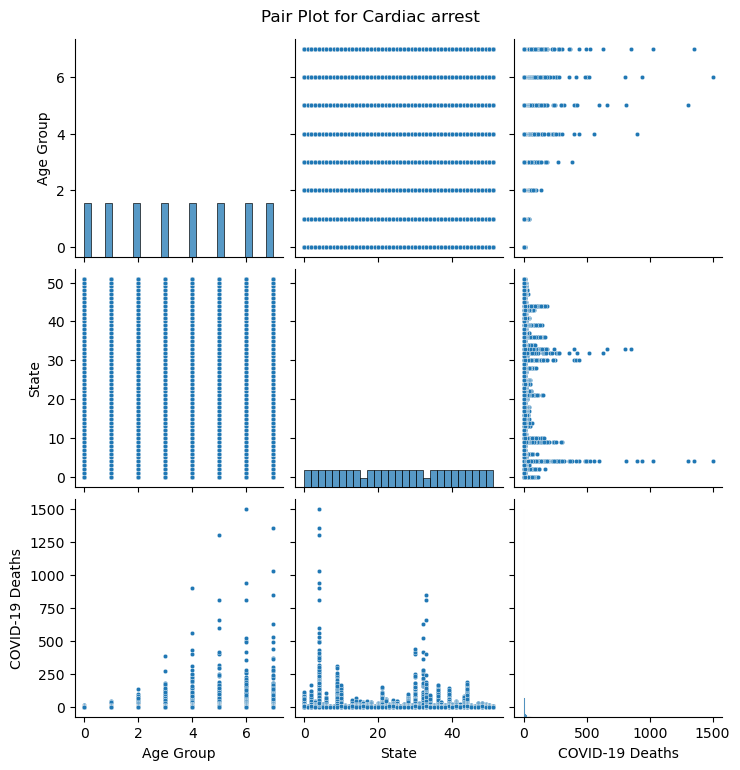

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


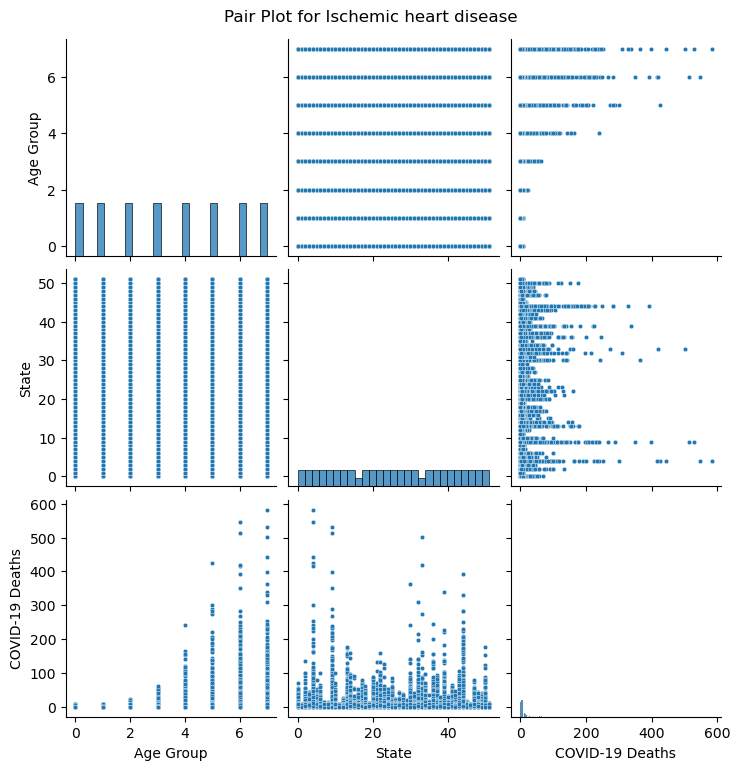

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


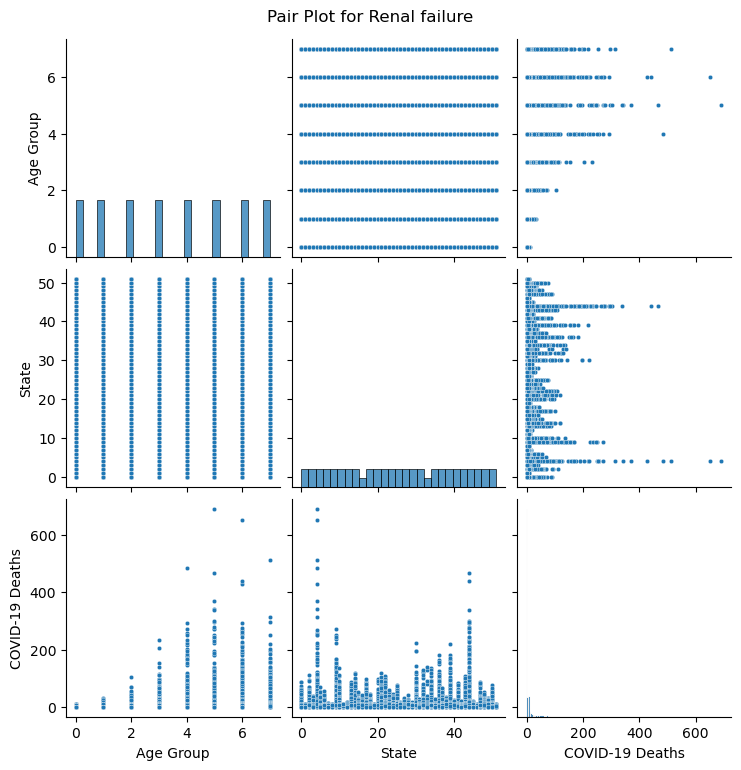

In [31]:
# Select columns to pair with
pair_plot_columns = ['Age Group', 'State', 'COVID-19 Deaths']

# Filter the dataframe for the selected conditions
conditions_for_pair_plot = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Diabetes', 'Cardiac arrest', 'Ischemic heart disease', 'Renal failure']
df_pair_plot_conditions = df_selected[df_selected['Condition'].isin(conditions_for_pair_plot)]

# Encode categorical variables for the pair plot within this section
df_pair_plot_encoded = df_pair_plot_conditions.copy()
df_pair_plot_encoded['State'] = df_pair_plot_encoded['State'].astype('category').cat.codes
df_pair_plot_encoded['Age Group'] = df_pair_plot_encoded['Age Group'].astype('category').cat.codes

# Use a for loop to create separate pair plots for each condition
for condition in conditions_for_pair_plot:
    df_condition = df_pair_plot_encoded[df_pair_plot_encoded['Condition'] == condition]
    g = sns.pairplot(df_condition[pair_plot_columns], plot_kws={'s': 10})
    plt.suptitle(f'Pair Plot for {condition}', y=1.02)
    pair_plot_condition = plt.gcf()
    plt.show()
    
    # Export the pair plot
    pair_plot_condition.savefig(os.path.join(path, '04 Analysis', 'Visualizations', f'pair_plot_condition{condition.replace(" ", "_").lower()}.png'))

### Insights from the Pair Plots
#### Distributions:
    Age Group: Higher density in certain age brackets; older age groups more frequently associated with higher COVID-19 death counts.
    
    COVID-19 Deaths: Vary significantly across conditions.
#### Relationships:
    Age Group vs. COVID-19 Deaths: Positive trend, older age groups have higher death counts.
    
    Condition vs. COVID-19 Deaths: Varying relationships with higher death counts for certain conditions.
#### Variables to Explore Further
    Age Group and Specific Conditions:
    Why: Understand disproportionate impact on older populations.
    
    State and COVID-19 Deaths:
    Why: Explore regional variations in COVID-19 impact.
    
    Condition Group/Condition and COVID-19 Deaths:
    Why: Identify high-risk condition groups and conditions.

# 6. Creating a Categorical Plot

### I will create a categorical plot for COVID-19 Deaths using the Condition Group and Age Group columns

<Figure size 1200x800 with 0 Axes>

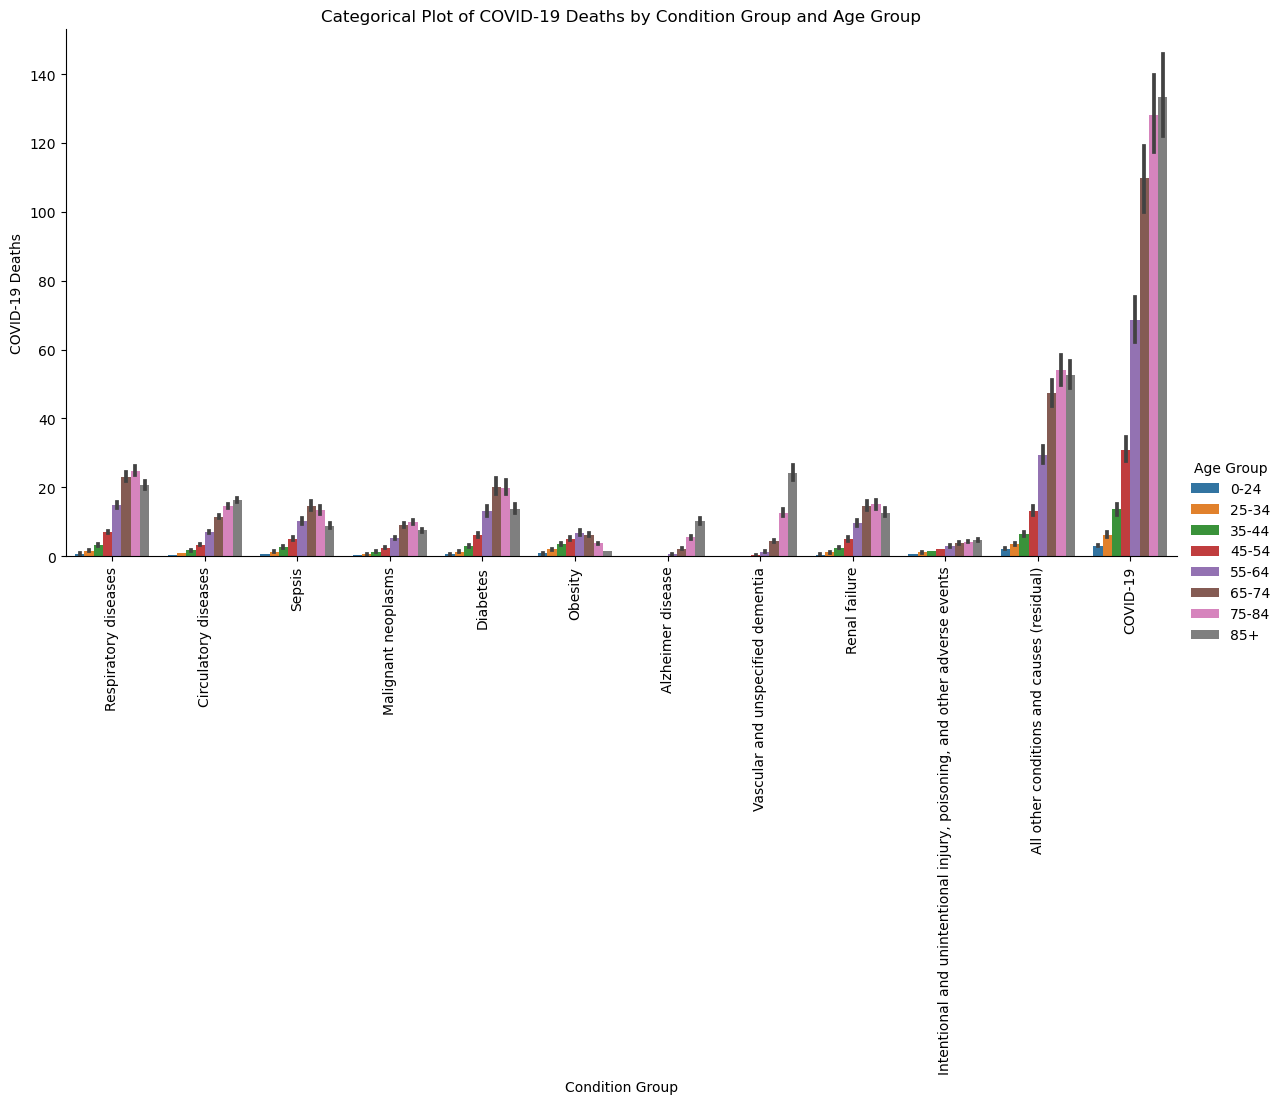

In [32]:
# Categorical plot for COVID-19 Deaths by Condition Group and Age Group
plt.figure(figsize=(12, 8))
sns.catplot(x='Condition Group', y='COVID-19 Deaths', hue='Age Group', data=df_selected, kind='bar', height=6, aspect=2)
plt.title('Categorical Plot of COVID-19 Deaths by Condition Group and Age Group')
plt.xticks(rotation=90)
catplot_conditiongroup_agegroup_deaths = plt.gcf()
plt.show()

### I will also create categorical plots for specific medical conditions from the "Condition" column

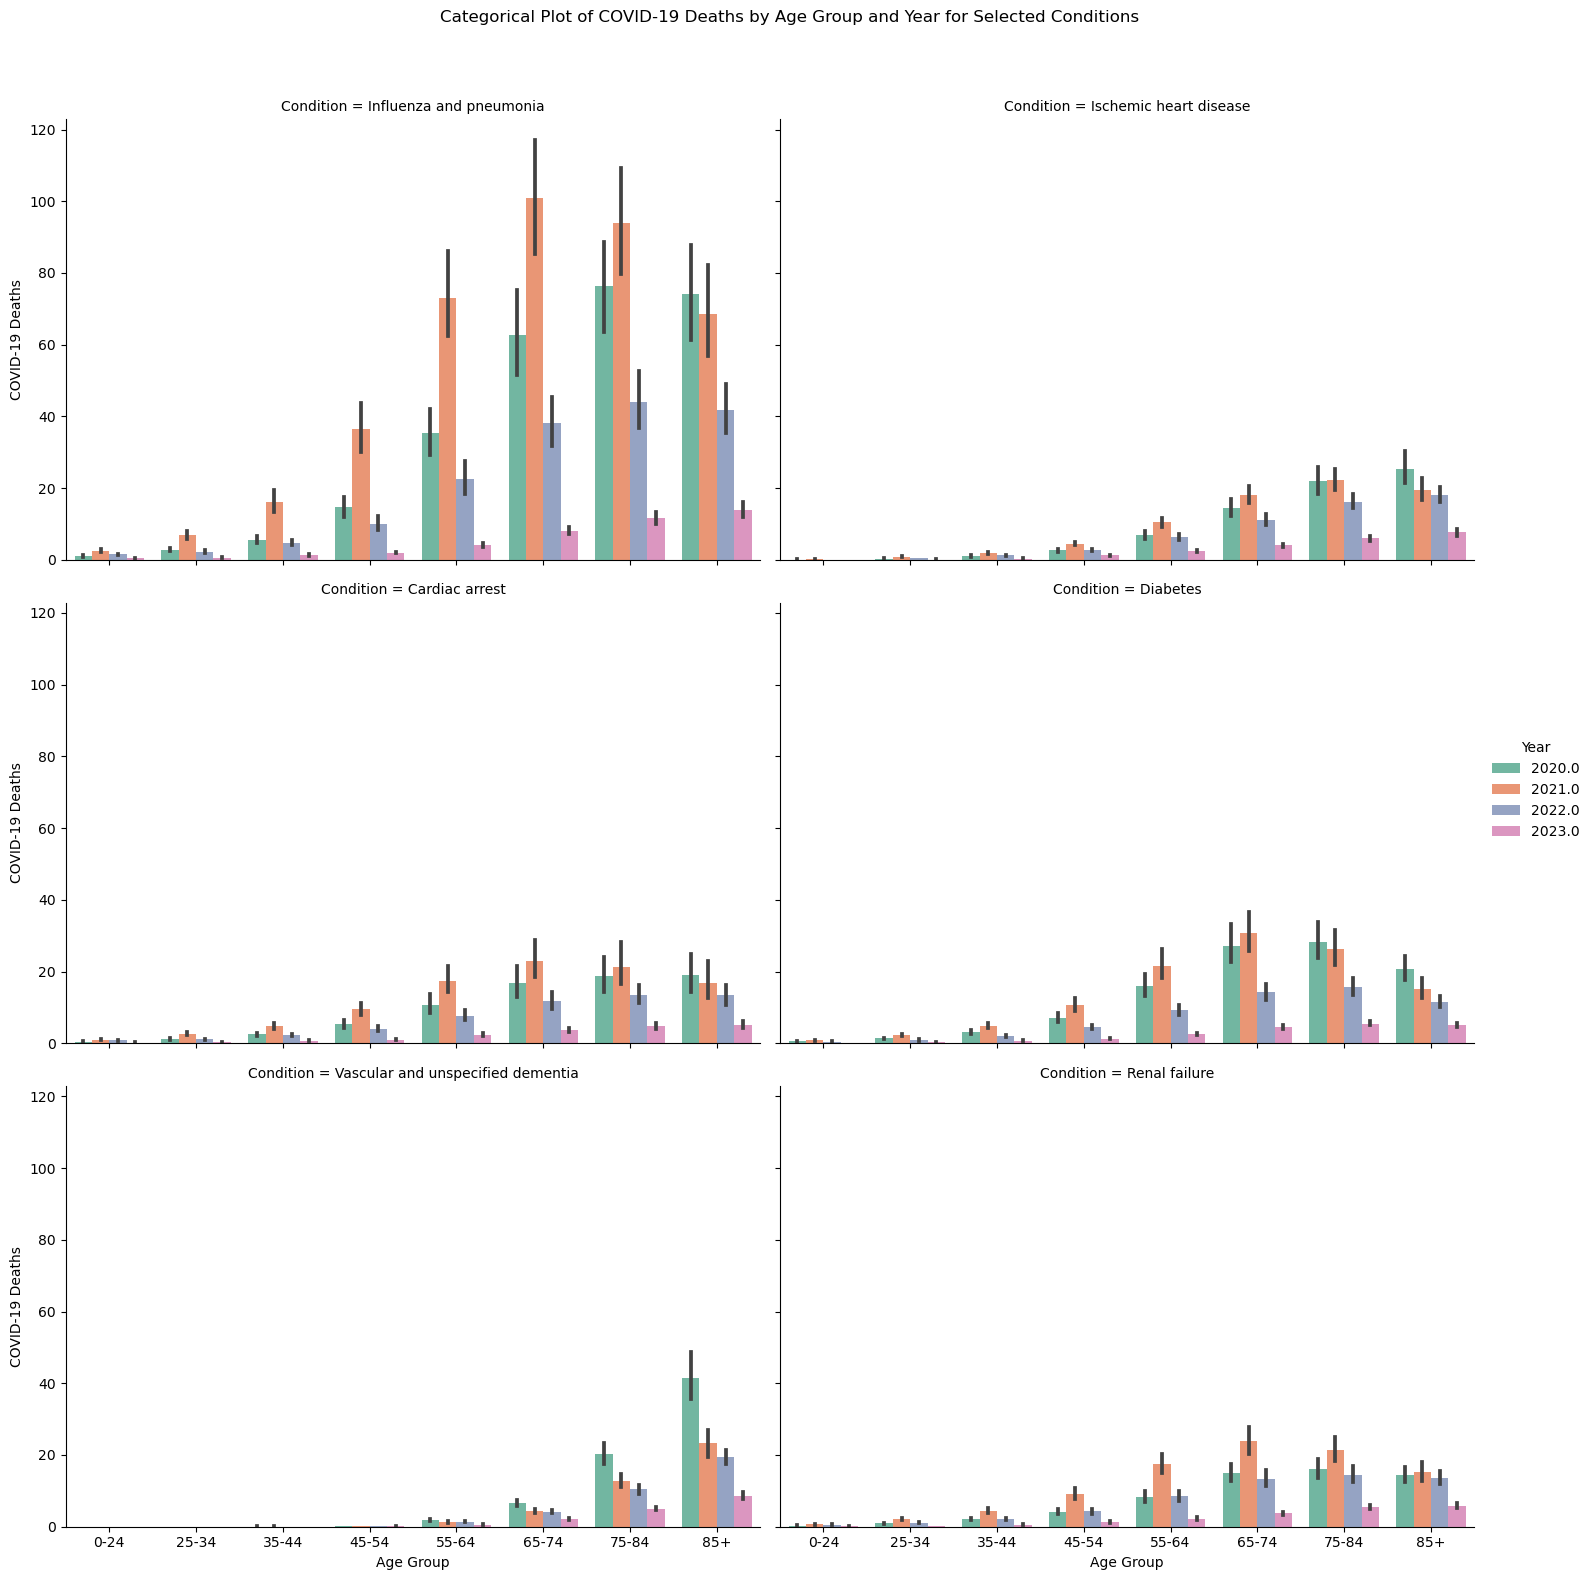

In [33]:
# Select columns and conditions for the plot
categorical_columns = ['Year', 'Age Group', 'COVID-19 Deaths']
conditions_for_categorical_plot = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Diabetes', 'Cardiac arrest', 'Ischemic heart disease', 'Renal failure']
df_categorical_conditions = df_selected[df_selected['Condition'].isin(conditions_for_categorical_plot)]

# Create a categorical plot
g = sns.catplot(
    x='Age Group', 
    y='COVID-19 Deaths', 
    hue='Year', 
    col='Condition', 
    col_wrap=2,
    data=df_categorical_conditions, 
    kind='bar', 
    height=5,
    aspect=1.5,
    palette='Set2')
g.fig.suptitle('Categorical Plot of COVID-19 Deaths by Age Group and Year for Selected Conditions', y=1.05)
catplot_selected_conditions = plt.gcf()
plt.show()

### Insights from the Categorical Plots
#### COVID-19 Deaths by Condition Group and Age Group:
    Higher Death Counts in Specific Condition Groups: Certain condition groups, such as influenza and pneumonia and cardiovascular diseases, show significantly higher COVID-19 death counts compared to others. This highlights the severe impact of COVID-19 on individuals with these underlying health conditions.

    Age Group Influence: Older age groups consistently show higher death counts across various condition groups. This reinforces the heightened vulnerability of older populations to severe outcomes when infected with COVID-19, especially if they have preexisting conditions.

#### COVID-19 Deaths by Age Group and Year for Selected Conditions:
    Temporal Trends: The categorical plots reveal variations in death counts over different years for specific conditions. This can indicate the impact of public health measures, treatments, and possibly the introduction of vaccines.

    Condition-Specific Insights: Conditions like diabetes, ischemic heart disease, and renal failure consistently show higher death counts across older age groups and different years.

# 7. Revisiting Our Questions

### Questions generated in exercise 6.1 to explore in the analysis:
#### Demographic Analysis:
    What are the most common conditions contributing to COVID-19 deaths in different age groups?
    How does the distribution of conditions contributing to COVID-19 deaths vary by age group?
#### Geographical Analysis:
    Which states have the highest and lowest prevalence of specific conditions contributing to COVID-19 deaths?
    Are there regional patterns in the types of conditions associated with COVID-19 deaths across the United States?
#### Temporal Analysis:
    How have COVID-19 death rates and contributing conditions changed over time?
    Are there any notable seasonal patterns or trends in COVID-19 deaths or in the prevalence of specific conditions contributing to COVID-19 deaths?
#### Predictive Modeling:
    Can a predictive model be developed to identify high-risk populations based on the presence of certain conditions, demographics, and geographic data?
    What factors are most predictive of COVID-19 death rates?

### Some preliminary answers to the above questions based on the analysis so far:
#### Demographic Analysis
    What are the most common conditions contributing to COVID-19 deaths in different age groups?
        
        From the categorical plots, influenza and pneumonia and cardiovascular diseases appear to be the most common conditions contributing to COVID-19 deaths across all age groups, with older age groups being particularly affected. Conditions like ischemic heart disease, diabetes, and renal failure also show high prevalence in COVID-19 deaths among older populations.

    How does the distribution of conditions contributing to COVID-19 deaths vary by age group?
        
        The distribution shows that older age groups have higher death counts for almost all conditions. Specifically, conditions such as diabetes, ischemic heart disease, and cerebrovascular diseases show a higher impact on older individuals, indicating a significant age-related vulnerability to COVID-19 mortality.

#### Geographical Analysis
    Which states have the highest and lowest prevalence of specific conditions contributing to COVID-19 deaths?
        
        Further analysis is needed.

    Are there regional patterns in the types of conditions associated with COVID-19 deaths across the United States?
        
        Further analysis is needed.

#### Temporal Analysis
    How have COVID-19 death rates and contributing conditions changed over time?
        
        The scatterplot of COVID-19 Deaths vs. Year indicates a slight decrease in death rates over time for specific conditions. Temporal analysis of number of mentions and COVID-19 deaths for specific conditions would provide more information.

    Are there any notable seasonal patterns or trends in COVID-19 deaths or in the prevalence of specific conditions contributing to COVID-19 deaths?
        
        Further time series analysis is needed.

#### Predictive Modeling
    Can a predictive model be developed to identify high-risk populations based on the presence of certain conditions, demographics, and geographic data?
        
        The strong correlations between COVID-19 Deaths and variables like Number of Mentions, Age Group, and Condition Group suggest that a predictive model could be developed.
 
    What factors are most predictive of COVID-19 death rates?
        
        Based on the analysis so far, the most predictive factors include the number of mentions of conditions, age group, and specific high-risk conditions such as respiratory and cardiovascular diseases. These factors consistently show strong correlations with COVID-19 death rates.

# 8. Define Hypotheses

## Some potential hypotheses to test:

### Hypothesis 1: If the age group is older, then the COVID-19 death count will be significantly higher compared to younger age groups across various conditions.
    The scatterplots and pair plots indicate that older populations consistently show higher death counts for multiple conditions, reinforcing age as a key risk factor. This is also supported by the moderate to strong positive correlations observed between Age Group and COVID-19 Deaths.

### Hypothesis 2: If an individual has influenza and pneumonia, vascular and unspecified dementia, diabetes, ischemic heart disease, or renal failure, then they will have a higher COVID-19 death rate compared to individuals with other conditions.
    The correlation analysis and scatterplots reveal very strong positive correlations between COVID-19 Deaths and these specific conditions, suggesting that individuals with these conditions are at a higher risk of COVID-19 mortality.

### Hypothesis 3: If the number of mentions of specific conditions in medical records is high, then the COVID-19 death rate will also be high for those conditions.
    The extremely strong correlation between Number of Mentions and COVID-19 Deaths (0.99) across multiple conditions suggests that mentions are a reliable indicator of the severity and impact of COVID-19 on these conditions.

# 9. Export Visualizations

In [35]:
# Export heatmaps
heatmap_corr_matrix.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_corr_matrix.png'))

In [40]:
# Export Scatterplots
scatterplot_mentions_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_mentions_deaths.png'))

scatterplot_agegroup_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_agegroup_deaths.png'))

scatterplot_mentions_agegroup.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_mentions_agegroup.png'))

scatterplot_condition_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_condition_deaths.png'))

scatterplot_year_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_year_deaths.png'))

scatterplot_influenza_pneumonia.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_influenza_pneumonia.png'))

scatterplot_vascular_dementia.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_vascular_dementia.png'))

scatterplot_ischemic_heart_disease.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_ischemic_heart_disease.png'))

scatterplot_renal_failure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_renal_failure.png'))

scatterplot_respiratory_distress.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_respiratory_distress.png'))

scatterplot_respiratory_distress_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_respiratory_distress_year.png'))

scatterplot_obesity_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_obesity_year.png'))

scatterplot_covid19_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_covid19_year.png'))

scatterplot_diabetes_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_diabetes_year.png'))

scatterplot_influenza_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_influenza_year.png'))

In [41]:
# Export Pair Plots
pair_plot_entire_dataset.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_plot_entire_dataset.png'))

In [42]:
# Export Categorical Plots
catplot_conditiongroup_agegroup_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_conditiongroup_agegroup_deaths.png'))

catplot_selected_conditions.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_selected_conditions.png'))

### END